<a href="https://colab.research.google.com/github/AisIzmailova/AisIzmailova_Practice_Notebooks/blob/master/Project3_BitPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Time Series

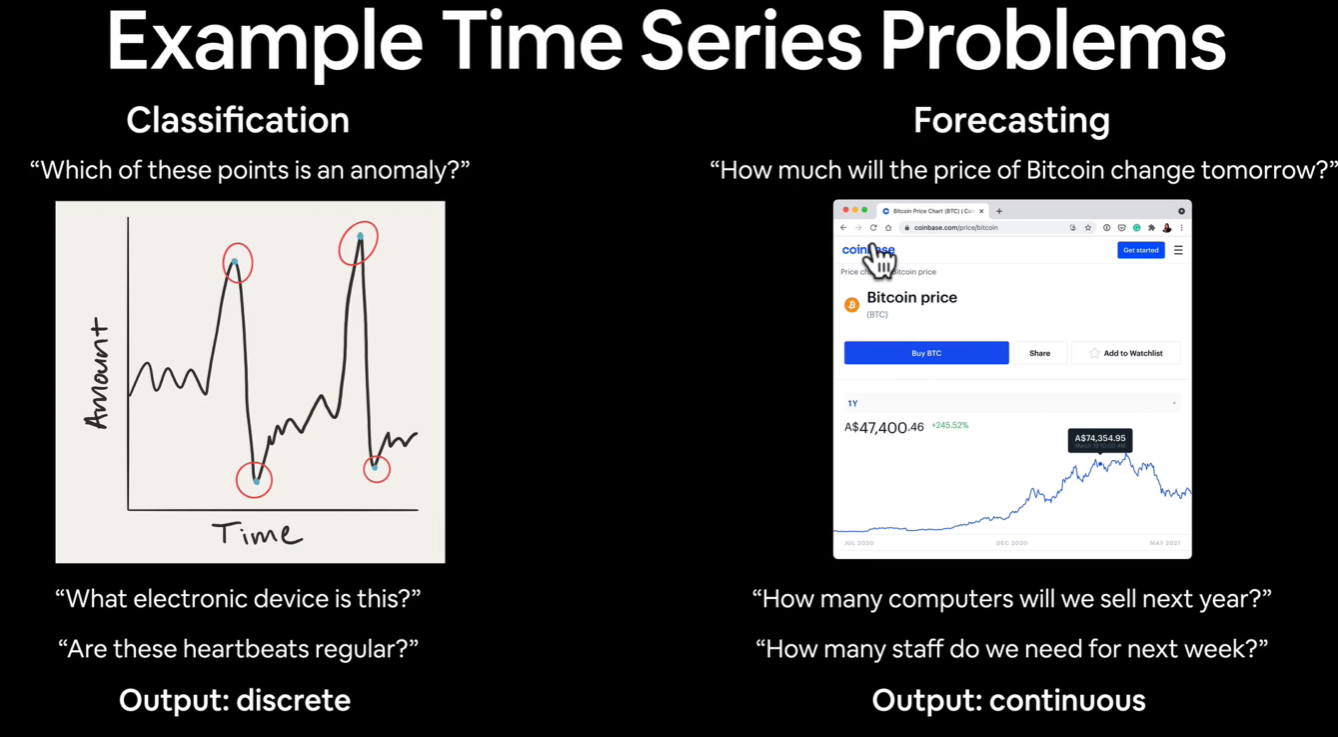

**Read:** https://www.uber.com/en-CA/blog/forecasting-introduction/

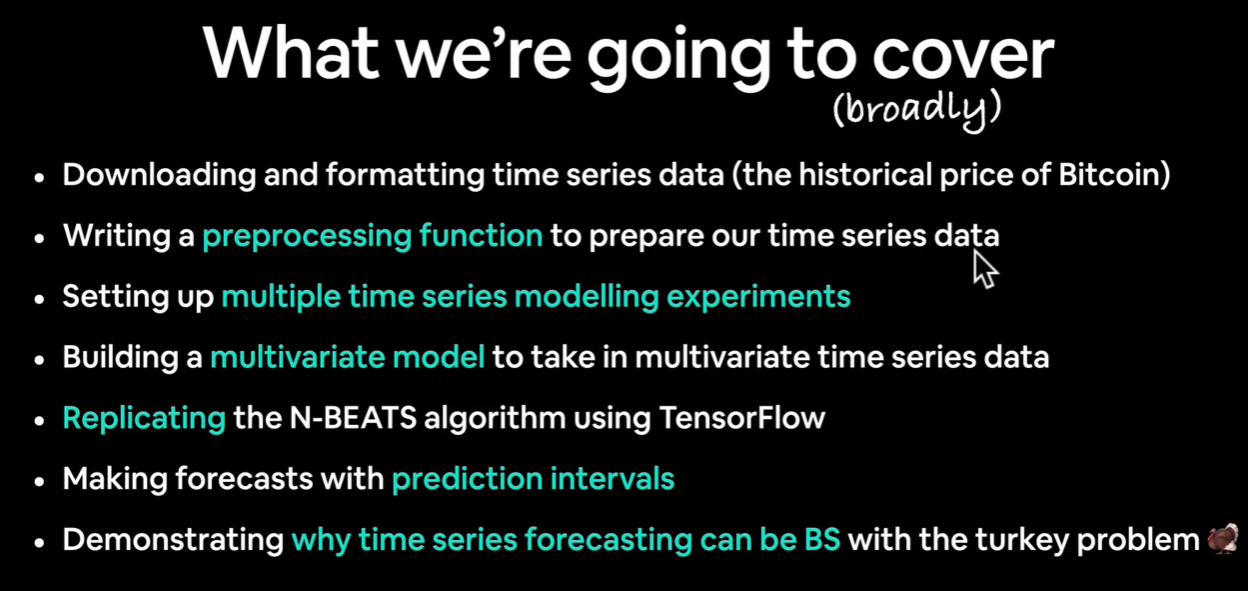

##Get the data

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile
import os
import pathlib
import numpy as np
import random
import datetime

In [2]:
!wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv"

--2024-01-20 03:20:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2024-01-20 03:20:09 (11.2 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [3]:
#Importing time series data with pandas
raw_df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", parse_dates=["Date"], index_col=["Date"])

In [4]:
raw_df.head()

Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC            123.65499       124.30466       124.75166   
2013-10-02      BTC            125.45500       123.65499       125.75850   
2013-10-03      BTC            108.58483       125.45500       125.66566   
2013-10-04      BTC            118.67466       108.58483       118.67500   
2013-10-05      BTC            121.33866       118.67466       121.93633   

            24h Low (USD)  
Date                       
2013-10-01      122.56349  
2013-10-02      123.63383  
2013-10-03       83.32833  
2013-10-04      107.05816  
2013-10-05      118.00566

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


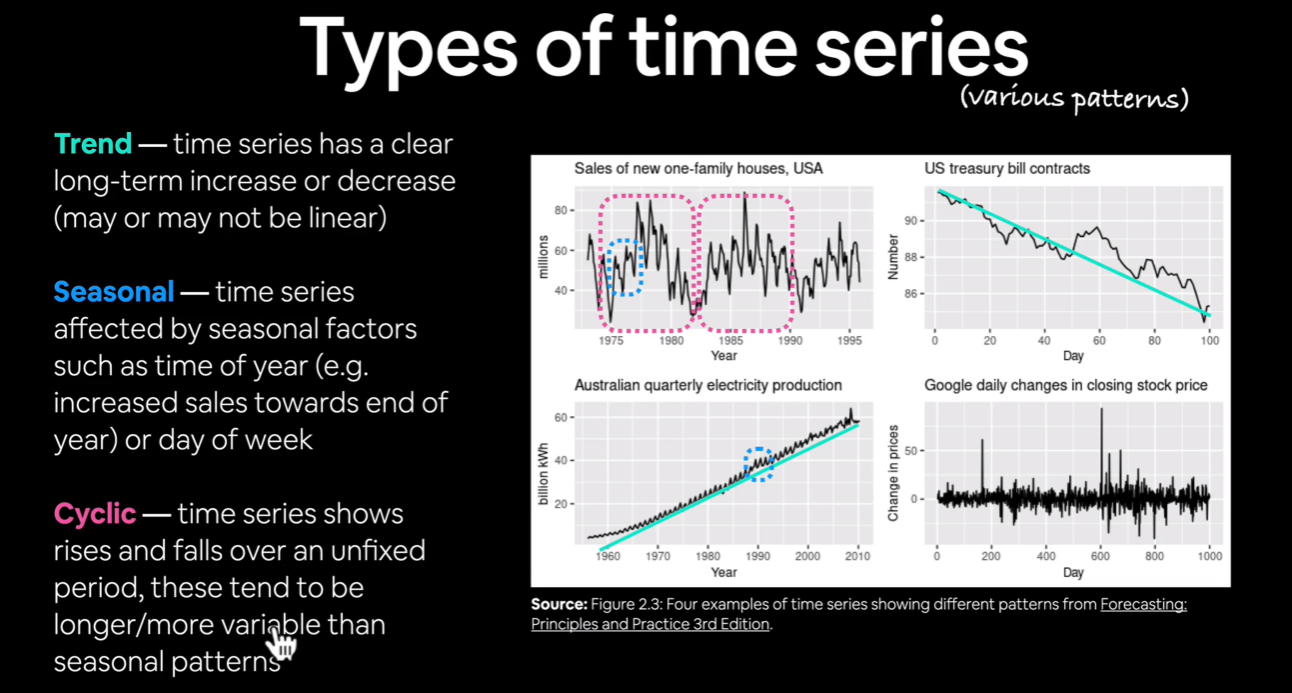

In [6]:
btc_price_df = pd.DataFrame(raw_df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
btc_price_df.head()

Price
Date                 
2013-10-01  123.65499
2013-10-02  125.45500
2013-10-03  108.58483
2013-10-04  118.67466
2013-10-05  121.33866

Text(0.5, 1.0, 'Price of Bitcoin from Oct 2013 to May 2021')

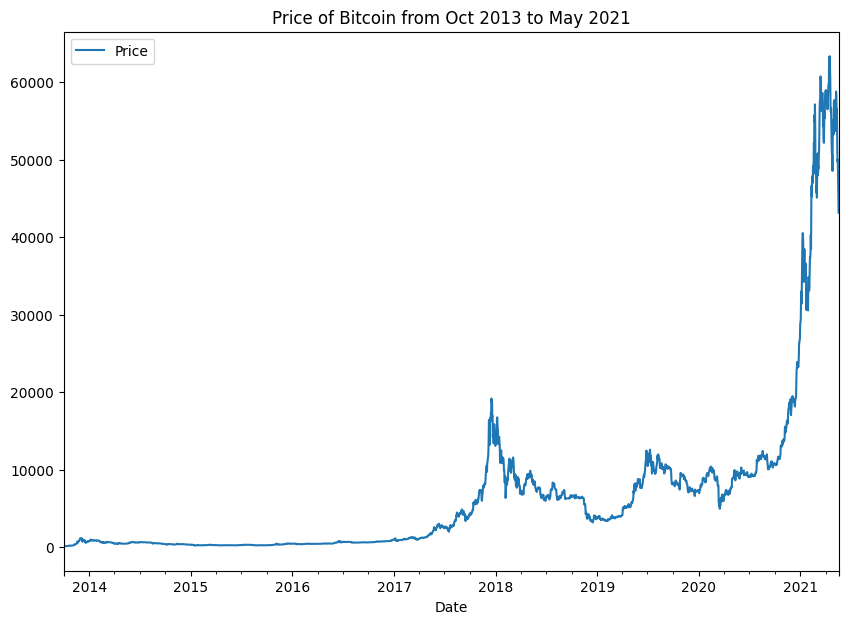

In [7]:
btc_price_df.plot(figsize=(10,7))
plt.ylabel=("BTC Price")
plt.title("Price of Bitcoin from Oct 2013 to May 2021")

Use Pythons csv reader to read the file

In [8]:
import csv
from datetime import datetime
def read_csv_file(filename):
  timesteps=[]
  btc_price=[]
  with open(filename,"r") as f:
    csv_reader=csv.reader(f,delimiter=',')
    next(csv_reader) #skip the first line (header)
    for line in csv_reader:
      timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
      btc_price.append(float(line[2]))
  return timesteps, btc_price

In [9]:
timesteps, btc_price = read_csv_file("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv")

In [10]:
timesteps[:10]

[datetime.datetime(2013, 10, 1, 0, 0),
 datetime.datetime(2013, 10, 2, 0, 0),
 datetime.datetime(2013, 10, 3, 0, 0),
 datetime.datetime(2013, 10, 4, 0, 0),
 datetime.datetime(2013, 10, 5, 0, 0),
 datetime.datetime(2013, 10, 6, 0, 0),
 datetime.datetime(2013, 10, 7, 0, 0),
 datetime.datetime(2013, 10, 8, 0, 0),
 datetime.datetime(2013, 10, 9, 0, 0),
 datetime.datetime(2013, 10, 10, 0, 0)]

In [11]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

Text(0.5, 1.0, 'Price of Bitcoin from Oct 2013 to May 2021')

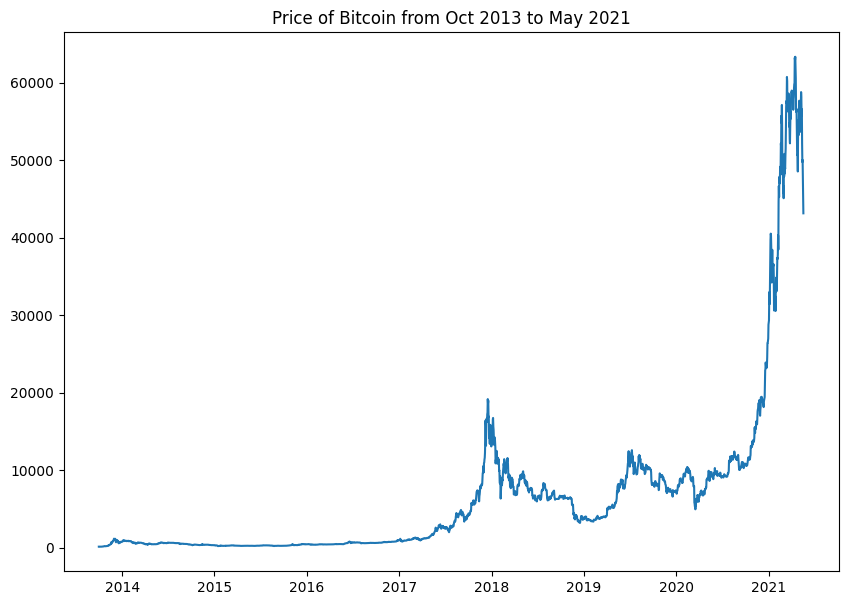

In [12]:
#Plot from csv
plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.ylabel=("BTC Price")
plt.title("Price of Bitcoin from Oct 2013 to May 2021")

The wrong way to prep datasets for timeseries problems

In [13]:
timestep = btc_price_df.index.to_numpy()
price = btc_price_df["Price"].to_numpy()
timestep[:10], price[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(timestep, price, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

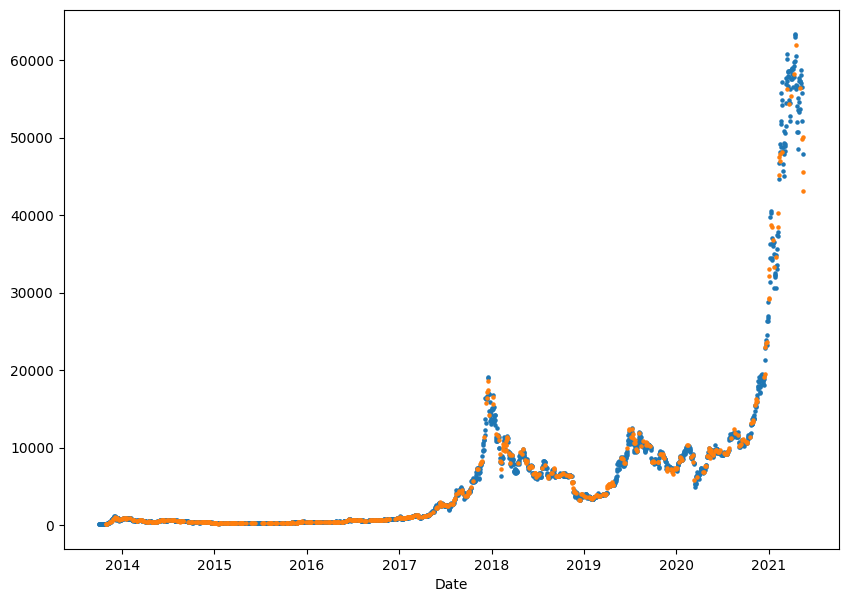

In [15]:
#Plot train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.show()

For time-series problems the random split of train and test data will cause a data leakage issue, therefore we will need to simulate the future dataset by splitting it into before and after an imaginary split time.

In [16]:
#Split train and test datasets
split_size=int(0.8*len(price))
X_train, y_train = timestep[:split_size], price[:split_size]
X_test, y_test = timestep[split_size:], price[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

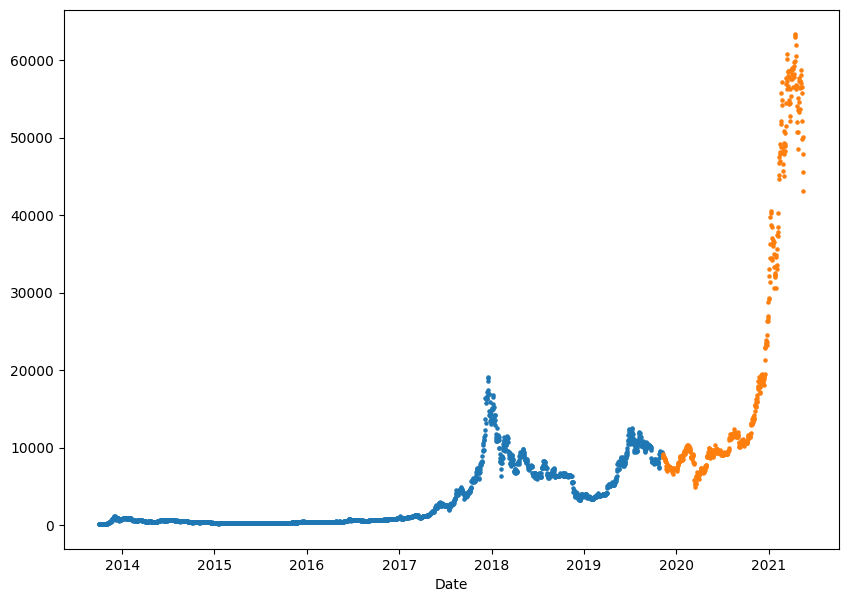

In [17]:
#Plot train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.show()

In [18]:
#Creating a plotting function
def plot_train_test_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plot train and test datasets for time-series problems.

  Parameters:
  timesteps: array of timestep values
  values: array of values across time
  format: style of the plot, default "."
  start: where to start the plot
  end: where to end the plot
  label: label to show on plot about values
  """

  #Plot the series
  # plt.figure(figsize=(10,7))
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Timesteps")
  # plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

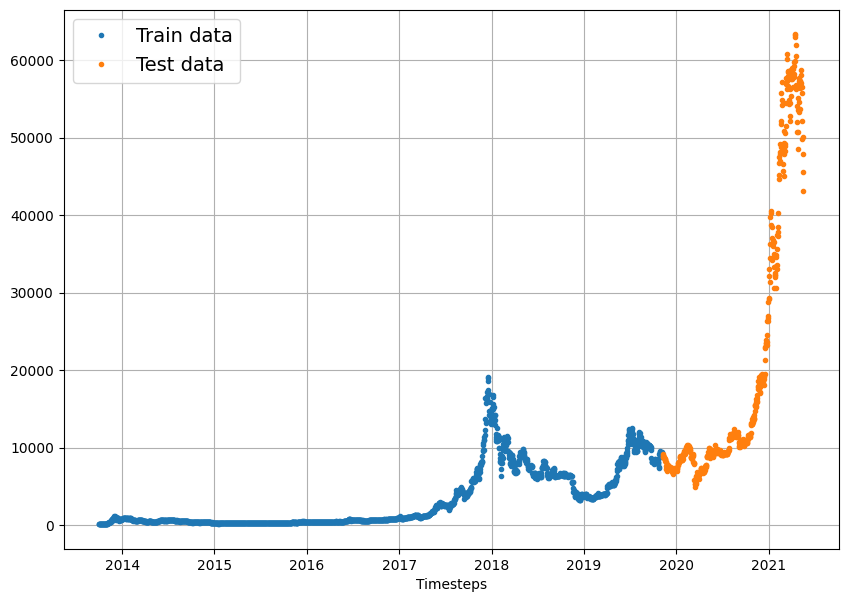

In [19]:
plt.figure(figsize=(10,7))
plot_train_test_time_series(X_train, y_train, label="Train data")
plot_train_test_time_series(X_test, y_test, label="Test data")

##Building models

- **Horizon** - number of timesteps into the future we are going to predict
- **Window size** - number of timesteps we are going to use to predict **horizon**

Models we will be building:\
0) Naive model (baseline) \
1) Dense model - horizon=1, window=7 \
2) Same as 1 - horizon=1, window=30 \
3) Same as 1 - hirozon=7, window=30 \
4) Conv1D  \
5) LSTM \
6) Same as 1 (but with multivariate data) \
7) N-Beats Algorithm \
8) Ensemble (multiple models optimized on different loss functions) \
9) Future prediction model (model to predict future values) \
10) Same as 1 (but with turkey data function)



###Build Baseline Model - Naive Bayes

Naive method:

$$\hat{y}_{t} = y_{t-1}$$

In [20]:
#Create a naive forecast
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [21]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

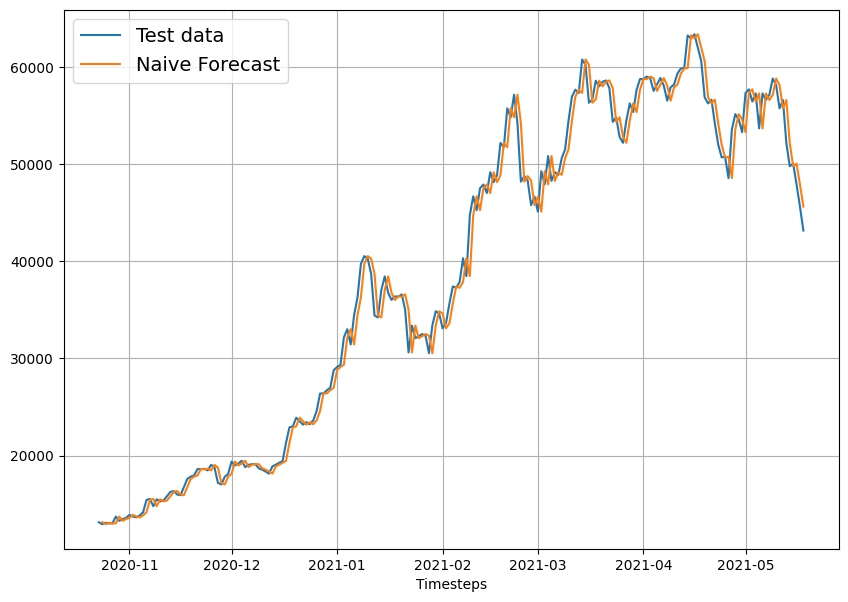

In [22]:
#Plot naive forecast
plt.figure(figsize=(10,7))
# plot_train_test_time_series(X_train, y_train, label="Train data")
plot_train_test_time_series(X_test, y_test, start=350, format="-", label="Test data")
plot_train_test_time_series(X_test[1:], naive_forecast, start=350, format="-", label="Naive Forecast")

Since this is a regression problem, we can use evaluation metrics for regression problems.

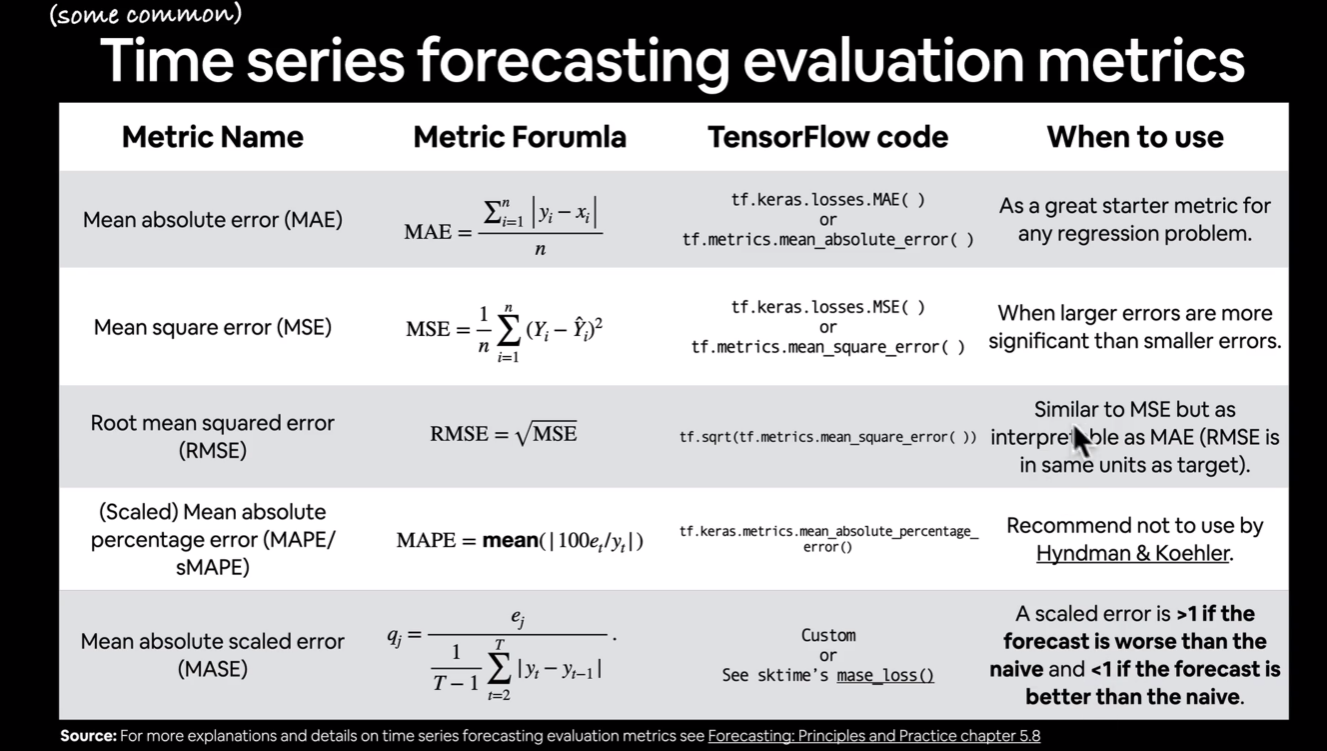

In [23]:
#MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of the data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  #Find MAE of native forecast (no seasonality)
  mae_naive_forecast = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae/mae_naive_forecast

In [24]:
mean_absolute_scaled_error(y_test[1:], naive_forecast)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9995699939182624>

In [25]:
#Define a function that calculates various metrics
def evaluate_time_series(y_true, y_pred):
  #Make sure float32 datatype
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred) #how much the predicted value is off from the true value
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return{"mae": mae,
         "mse": mse,
         "rmse": rmse,
         "mape": mape,
         "mase": mase}

In [26]:
naive_results = evaluate_time_series(y_test[1:], naive_forecast)
naive_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=567.9802>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1147547.0>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=1071.2362>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.516525>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=0.99957>}

##Format data: Windowing our dataset

```
Windowing for one week
[0,1,2,3,4,5,6] -> [7]
[1,2,3,4,5,6,7] -> [8]
[2,3,4,5,6,7,8] -> [9]
```

In [27]:
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [28]:
#Let's set up global variables for window and horizon size
HORIZON=1
WINDOW_SIZE=7

In [29]:
#Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Create labels for windowed dataseet.
  E.g. if horizon=1
  Input: [0,1,2,3,4,5,6,7] -> Output: ([0,1,2,3,4,5,6],[7])
  """
  return x[:,:-horizon], x[:, -horizon:]

In [30]:
#Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


To create a sliding window across the whole dataset, we will use numpy indexing.

Our function will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6] ).
2. Use Numpy indexing to create a 2D array of multiple window steps, for example:
```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
3. Use the 2D array of multiple window steps to index on a target series.
4. Use our `get_labelled_windows()` function to turn the window steps into windows with specified horizon.

**Read:**
- https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5?gi=312a728b9c5f
- https://numpy.org/doc/stable/user/basics.indexing.html

In [31]:
#Create function to view Numpy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled window of window_size with horizon size labels.
  """
  #1.Create a window of specific window size
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  print(f"Window step: {window_step}")
  #2.Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T #create 2D array of window size
  print(f"Window indexes: {window_indexes, window_indexes.shape}")
  #3.Index on a target array (a time series) with 2D array of multiple window steps
  window_array = x[window_indexes]
  print(f"Window array: {window_array}")
  #4.Get the labelled windows
  windows, labels = get_labelled_windows(window_array, horizon=horizon)
  return windows, labels

In [32]:
np.expand_dims(np.arange(8), axis=0)

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [33]:
len(btc_price)

2787

In [34]:
np.expand_dims(np.arange(len(btc_price)-7), axis=0).T

array([[   0],
       [   1],
       [   2],
       ...,
       [2777],
       [2778],
       [2779]])

In [35]:
windows, labels = make_windows(price)

Window step: [[0 1 2 3 4 5 6 7]]
Window indexes: (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))
Window array: [[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


In [36]:
len(windows), len(labels)

(2780, 2780)

In [37]:
#Visualize the first 3 windows and labels
for i in range(3):
  print(f"Window: {windows[i]} -> Label: {labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [38]:
#Visualize the last 3 windows and labels
for i in range(3):
  print(f"Window: {windows[i-3]} -> Label: {labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


**Note** there is a function similar to above in tf.keras.preprocessing - https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

##Turning windows into train and test datasets

In [39]:
#Make the train test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows)*(1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [40]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows, labels)

In [41]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [42]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

##Create a modelling checkpoint callback

In [43]:
def create_model_checkpoint_callback(model_name, save_filepath="model_experiments"):
  import os
  checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_filepath, model_name),
                                                           monitor="val_loss",
                                                           verbose=0,
                                                           save_best_only=True)
  return checkpoint_callback

###Build Model 1

In [44]:
from tensorflow.keras import layers
tf.random.set_seed(42)

#Create the model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1")

#Compile the model
model_1.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae", "mse"]
)

#Fit the model
history_1 = model_1.fit(x=train_windows,
                        y=train_labels,
                        epochs=100,
                        validation_data=(test_windows, test_labels),
                        verbose=1,
                        batch_size=128,
                        callbacks=[create_model_checkpoint_callback(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 7s 181ms/step - loss: 2257.5356 - mae: 2257.5356 - mse: 15006033.0000 - val_loss: 1348.1921 - val_mae: 1348.1921 - val_mse: 4568699.5000
Epoch 2/100
18/18 [==============================] - 0s 9ms/step - loss: 386.9225 - mae: 386.9225 - mse: 556084.0625 - val_loss: 1886.0310 - val_mae: 1886.0310 - val_mse: 8019651.0000
Epoch 3/100
18/18 [==============================] - 1s 68ms/step - loss: 232.4487 - mae: 232.4487 - mse: 238973.2500 - val_loss: 1056.7021 - val_mae: 1056.7021 - val_mse: 3145406.2500
Epoch 4/100
18/18 [==============================] - 1s 33ms/step - loss: 171.9990 - mae: 171.9990 - mse: 146856.2812 - val_loss: 913.7910 - val_mae: 913.7910 - val_mse: 2572379.0000
Epoch 5/100
18/18 [==============================] - 0s 26ms/step - loss: 155.1474 - mae: 155.1474 - mse: 131314.9844 - val_loss: 844.1440 - val_mae: 844.1440 - val_mse: 2375162.0000
Epoch 6/100
18/18 [==============================] - 0s 26ms/step - loss: 1

In [45]:
#Evaluate the model
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 658.4846 - mae: 658.4846 - mse: 1350249.7500


[658.4845581054688, 658.4845581054688, 1350249.75]

In [46]:
#Load in the best saved model and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1")
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 565.2092 - mae: 565.2092 - mse: 1158454.5000


[565.209228515625, 565.209228515625, 1158454.5]

##Make forecast on test dataset

To make "forecasts" on the test dataset, we will write a function:

1. Take in a train model
2. Take in some input data
3. Pass the input data to the model's predict method
4. Return the prediction

In [47]:
def make_preds(model, input_data):
  """Uses models to make predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [48]:
model_1_preds = make_preds(model_1,test_windows)
model_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8858.175, 8798.148, 9053.82 , 8788.065, 8743.101, 8747.977,
       8679.644, 8535.223, 8466.944, 8537.355], dtype=float32)>

In [49]:
test_labels.shape, model_1_preds.shape

((556, 1), TensorShape([556]))

In [50]:
model_1_results = evaluate_time_series(tf.squeeze(test_labels), model_1_preds)
model_1_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=565.20917>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1158454.5>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=1076.3153>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.5277812>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=0.992916>}

In [51]:
naive_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=567.9802>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1147547.0>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=1071.2362>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.516525>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=0.99957>}

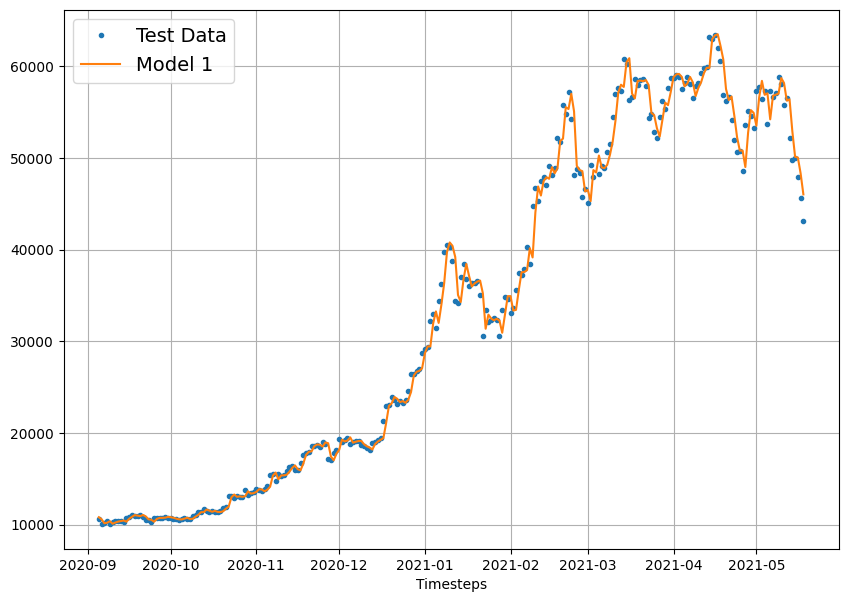

In [52]:
#Visualize predictions
offset=300
plt.figure(figsize=(10,7))
#Account for the test_window offset and index into test_labels to ensure correct plotting
plot_train_test_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label="Test Data")
plot_train_test_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="Model 1")

Why forecast values appear slightly after the test data?
**Read**: https://otexts.com/fpp3/acf.html

###Build Model 2

In [53]:
#Let's set up global variables for window and horizon size for model 2
HORIZON_2=1
WINDOW_SIZE_2=30

In [54]:
#Create windows
windows_2, labels_2 = make_windows(price, window_size=WINDOW_SIZE_2, horizon=HORIZON_2)
len(windows_2), len(labels_2)

Window step: [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30]]
Window indexes: (array([[   0,    1,    2, ...,   28,   29,   30],
       [   1,    2,    3, ...,   29,   30,   31],
       [   2,    3,    4, ...,   30,   31,   32],
       ...,
       [2754, 2755, 2756, ..., 2782, 2783, 2784],
       [2755, 2756, 2757, ..., 2783, 2784, 2785],
       [2756, 2757, 2758, ..., 2784, 2785, 2786]]), (2757, 31))
Window array: [[  123.65499      125.455        108.58483    ...   192.75666
    197.4          196.02499   ]
 [  125.455        108.58483      118.67466    ...   197.4
    196.02499      198.04883   ]
 [  108.58483      118.67466      121.33866    ...   196.02499
    198.04883      198.93233   ]
 ...
 [63346.78903511 61965.7825981  60574.44472823 ... 49764.1320816
  50032.69313676 47885.62525472]
 [61965.7825981  60574.44472823 56850.83016569 ... 50032.69313676
  47885.62525472 45604.61575361]
 [60574.44472823 56850.83016569 56224.1015877

(2757, 2757)

In [55]:
#Split train and test sets
train_windows_2, test_windows_2, train_labels_2, test_labels_2 = make_train_test_splits(windows_2, labels_2, test_split=0.2)
len(train_windows_2), len(test_windows_2), len(train_labels_2), len(test_labels_2)

(2205, 552, 2205, 552)

In [56]:
#Create the model

tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON_2)
], name="model_2")

#Compile the model
model_2.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae", "mse"]
)

#Fit the model
history_2 = model_2.fit(train_windows_2,
                        train_labels_2,
                        epochs=100,
                        verbose=1,
                        validation_data=(test_windows_2, test_labels_2),
                        callbacks=[create_model_checkpoint_callback(model_name=model_2.name)])

Epoch 1/100
69/69 [==============================] - 2s 11ms/step - loss: 626.1441 - mae: 626.1441 - mse: 1893837.0000 - val_loss: 1335.7760 - val_mae: 1335.7760 - val_mse: 5360173.5000
Epoch 2/100
69/69 [==============================] - 0s 4ms/step - loss: 208.9664 - mae: 208.9664 - mse: 212023.7188 - val_loss: 1408.8384 - val_mae: 1408.8384 - val_mse: 4994512.5000
Epoch 3/100
69/69 [==============================] - 1s 9ms/step - loss: 219.5765 - mae: 219.5765 - mse: 213836.5000 - val_loss: 1007.4113 - val_mae: 1007.4113 - val_mse: 3396482.7500
Epoch 4/100
69/69 [==============================] - 1s 9ms/step - loss: 188.1262 - mae: 188.1262 - mse: 167587.1406 - val_loss: 930.6963 - val_mae: 930.6963 - val_mse: 2725968.5000
Epoch 5/100
69/69 [==============================] - 1s 8ms/step - loss: 170.1095 - mae: 170.1095 - mse: 145853.0469 - val_loss: 921.9142 - val_mae: 921.9142 - val_mse: 2725877.2500
Epoch 6/100
69/69 [==============================] - 1s 9ms/step - loss: 173.7955 

In [57]:
#Evaluate the model
model_2.evaluate(test_windows_2, test_labels_2)

18/18 [==============================] - 0s 2ms/step - loss: 822.1120 - mae: 822.1120 - mse: 1975750.0000


[822.1119995117188, 822.1119995117188, 1975750.0]

In [58]:
#Load best saved model and evaluate it
model_2=tf.keras.models.load_model("model_experiments/model_2")
model_2.evaluate(test_windows_2, test_labels_2)

18/18 [==============================] - 0s 2ms/step - loss: 583.1575 - mae: 583.1575 - mse: 1185926.1250


[583.157470703125, 583.157470703125, 1185926.125]

In [59]:
#Make predictions
model_2_preds = make_preds(model_2, test_windows_2)

18/18 [==============================] - 0s 2ms/step


In [60]:
#Get results
model_2_results = evaluate_time_series(tf.squeeze(test_labels_2), model_2_preds)
model_2_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=583.1575>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1185926.1>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=1089.0023>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.6499352>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=1.019365>}

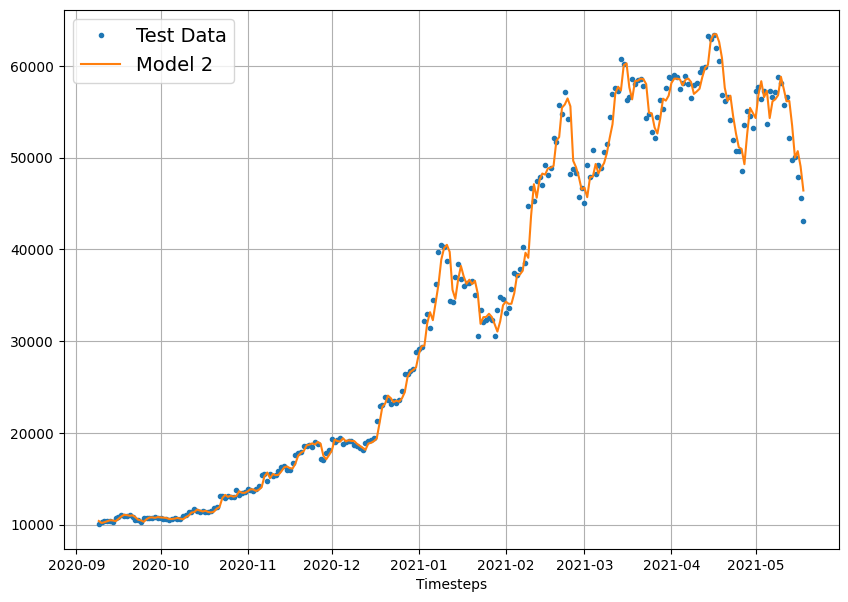

In [61]:
#Visualize predictions
offset=300
plt.figure(figsize=(10,7))
#Account for the test_window offset and index into test_labels to ensure correct plotting
plot_train_test_time_series(timesteps=X_test[-len(test_windows_2):], values=test_labels_2[:,0], start=offset, label="Test Data")
plot_train_test_time_series(timesteps=X_test[-len(test_windows_2):], values=model_2_preds, start=offset, format="-", label="Model 2")

###Build Model 3

In [62]:
#Let's set up global variables for window and horizon size for model 3
HORIZON_3=7
WINDOW_SIZE_3=30

In [63]:
#Create windows
windows_3, labels_3 = make_windows(price, window_size=WINDOW_SIZE_3, horizon=HORIZON_3)
len(windows_3), len(labels_3)

Window step: [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36]]
Window indexes: (array([[   0,    1,    2, ...,   34,   35,   36],
       [   1,    2,    3, ...,   35,   36,   37],
       [   2,    3,    4, ...,   36,   37,   38],
       ...,
       [2748, 2749, 2750, ..., 2782, 2783, 2784],
       [2749, 2750, 2751, ..., 2783, 2784, 2785],
       [2750, 2751, 2752, ..., 2784, 2785, 2786]]), (2751, 37))
Window array: [[  123.65499      125.455        108.58483    ...   210.3075
    225.02         248.25333   ]
 [  125.455        108.58483      118.67466    ...   225.02
    248.25333      262.32666   ]
 [  108.58483      118.67466      121.33866    ...   248.25333
    262.32666      294.48699   ]
 ...
 [58171.9090187  59295.95004401 59822.90167743 ... 49764.1320816
  50032.69313676 47885.62525472]
 [59295.95004401 59822.90167743 59853.19724227 ... 50032.69313676
  47885.62525472 45604.61575361]
 [59822.90167743 59853.1972

(2751, 2751)

In [64]:
#Split train and test sets
train_windows_3, test_windows_3, train_labels_3, test_labels_3 = make_train_test_splits(windows_3, labels_3, test_split=0.2)
len(train_windows_3), len(test_windows_3), len(train_labels_3), len(test_labels_3)

(2200, 551, 2200, 551)

In [65]:
#Create the model

tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON_3)
], name="model_3")

#Compile the model
model_3.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae", "mse"]
)

#Fit the model
history_3 = model_3.fit(train_windows_3,
                        train_labels_3,
                        epochs=100,
                        verbose=1,
                        validation_data=(test_windows_3, test_labels_3),
                        callbacks=[create_model_checkpoint_callback(model_name=model_3.name)])

Epoch 1/100
69/69 [==============================] - 2s 11ms/step - loss: 614.6813 - mae: 614.6813 - mse: 2370039.5000 - val_loss: 1883.1713 - val_mae: 1883.1713 - val_mse: 10469522.0000
Epoch 2/100
69/69 [==============================] - 0s 4ms/step - loss: 363.6682 - mae: 363.6682 - mse: 617822.8125 - val_loss: 2026.1239 - val_mae: 2026.1239 - val_mse: 11678868.0000
Epoch 3/100
69/69 [==============================] - 1s 8ms/step - loss: 322.6971 - mae: 322.6971 - mse: 492877.5000 - val_loss: 1667.5062 - val_mae: 1667.5062 - val_mse: 8436929.0000
Epoch 4/100
69/69 [==============================] - 1s 9ms/step - loss: 298.5886 - mae: 298.5886 - mse: 440822.5000 - val_loss: 1486.3560 - val_mae: 1486.3560 - val_mse: 7194336.5000
Epoch 5/100
69/69 [==============================] - 0s 4ms/step - loss: 279.6648 - mae: 279.6648 - mse: 386223.9688 - val_loss: 1783.0275 - val_mae: 1783.0275 - val_mse: 9311961.0000
Epoch 6/100
69/69 [==============================] - 0s 3ms/step - loss: 270

In [66]:
#Evaluate the model
model_3.evaluate(test_windows_3, test_labels_3)

18/18 [==============================] - 0s 3ms/step - loss: 1347.4418 - mae: 1347.4418 - mse: 5820839.0000


[1347.4417724609375, 1347.4417724609375, 5820839.0]

In [67]:
#Load best saved model and evaluate it
model_3=tf.keras.models.load_model("model_experiments/model_3")
model_3.evaluate(test_windows_3, test_labels_3)

18/18 [==============================] - 0s 3ms/step - loss: 1202.4963 - mae: 1202.4963 - mse: 5181807.5000


[1202.496337890625, 1202.496337890625, 5181807.5]

In [68]:
#Make predictions
model_3_preds = make_preds(model_3, test_windows_3)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9430.734 , 9448.175 , 9316.882 , 9437.16  , 9455.708 , 9664.493 ,
        9630.659 ],
       [9005.677 , 9053.677 , 8904.744 , 9183.664 , 8958.745 , 9331.559 ,
        9297.234 ],
       [8866.464 , 8823.994 , 8895.774 , 8992.762 , 8968.817 , 9278.885 ,
        9211.224 ],
       [9043.036 , 9088.382 , 9218.192 , 9126.6455, 9181.226 , 9374.906 ,
        9498.6875],
       [8891.873 , 8994.322 , 9084.737 , 8927.235 , 9124.606 , 9100.962 ,
        9289.55  ]], dtype=float32)>

In [69]:
test_labels_3.shape, model_3_preds.shape

((551, 7), TensorShape([551, 7]))

##Adjust evaluation function to account for different dimensions

In [70]:
#Define a function that calculates various metrics
def evaluate_time_series(y_true, y_pred):
  #Make sure float32 datatype
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred) #how much the predicted value is off from the true value
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  #Account for different dimensions of the metrics
  if mae.ndim>0:
    mae=tf.reduce_mean(mae)
    mse=tf.reduce_mean(mse)
    rmse=tf.reduce_mean(rmse)
    mape=tf.reduce_mean(mape)
    mase=tf.reduce_mean(mase)

  return{"mae": mae,
         "mse": mse,
         "rmse": rmse,
         "mape": mape,
         "mase": mase}

In [71]:
#Get results
model_3_results = evaluate_time_series(tf.squeeze(test_labels_3), model_3_preds)
model_3_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=1202.4963>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=5181807.5>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=1385.5125>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=5.453895>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=2.139775>}

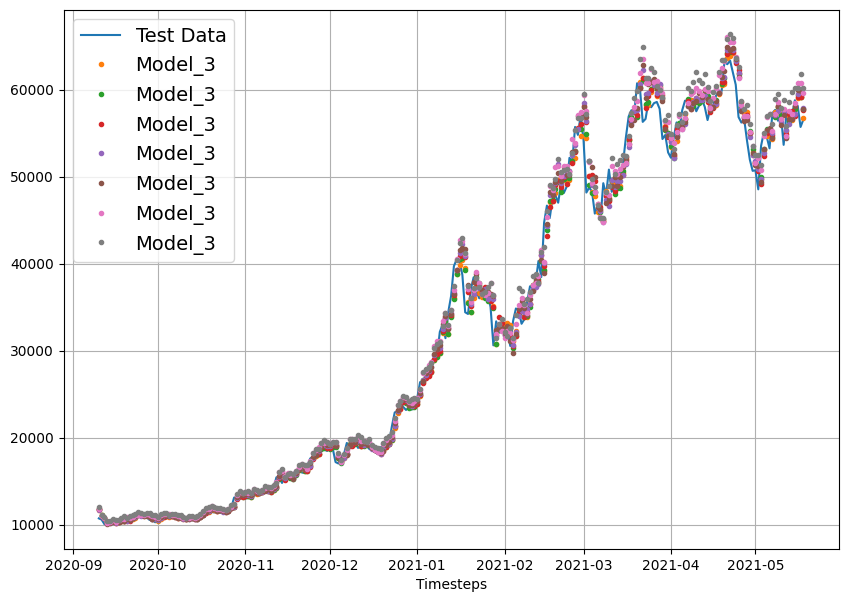

In [72]:
#Visualize the predictions
offset=300
plt.figure(figsize=(10,7))
plot_train_test_time_series(timesteps=X_test[-len(test_windows_3):], values=test_labels_3[:,0], format="-", start=offset, label="Test Data")
plot_train_test_time_series(timesteps=X_test[-len(test_windows_3):], values=model_3_preds, start=offset, label="Model_3")

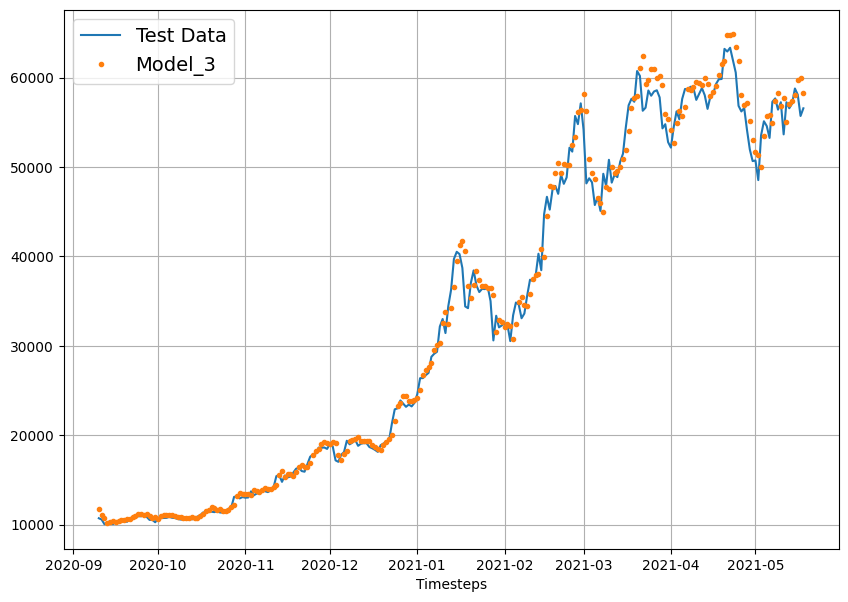

In [73]:
#Take a mean value of predictions to visualize
offset=300
plt.figure(figsize=(10,7))
plot_train_test_time_series(timesteps=X_test[-len(test_windows_3):], values=test_labels_3[:,0], format="-", start=offset, label="Test Data")
plot_train_test_time_series(timesteps=X_test[-len(test_windows_3):], values=tf.reduce_mean(model_3_preds, axis=1), start=offset, label="Model_3")

##Compare results of different models

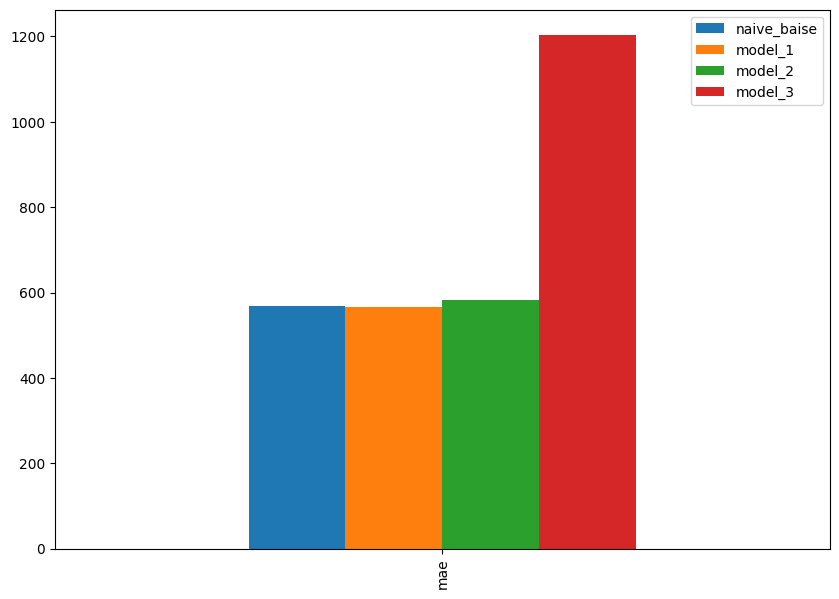

In [74]:
model_results = pd.DataFrame({"naive_baise": naive_results["mae"].numpy(),
                              "model_1": model_1_results["mae"].numpy(),
                              "model_2": model_2_results["mae"].numpy(),
                              "model_3": model_3_results["mae"].numpy()}, index=["mae"]).plot(figsize=(10,7), kind="bar")

Why naive results are so good? One of the reasons could be due to the presence of autocorrelation in the data. If a time series has autocorrelation, it means the value at `t+1` is typically close to the value at `t`. In other words, today's value is probably pretty close to yesterday's value. \
**Read:** https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424

###Build Model 4

In [75]:
#Let's set up global variables for window and horizon size for model 3
HORIZON_4=1
WINDOW_SIZE_4=7

In [76]:
#Create windows
windows_4, labels_4 = make_windows(price, window_size=WINDOW_SIZE_4, horizon=HORIZON_4)
len(windows_4), len(labels_4)

Window step: [[0 1 2 3 4 5 6 7]]
Window indexes: (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))
Window array: [[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


(2780, 2780)

In [77]:
#Split train and test sets
train_windows_4, test_windows_4, train_labels_4, test_labels_4 = make_train_test_splits(windows_4, labels_4, test_split=0.2)
len(train_windows_4), len(test_windows_4), len(train_labels_4), len(test_labels_4)

(2224, 556, 2224, 556)

For Conv1D we need an input shape of: `(batch_size, timesteps, input_dims)`.

In [78]:
train_windows_4[0].shape

(7,)

In [79]:
x=tf.constant(train_windows_4[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [80]:
#Create expand_dim layer
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
expand_dims_layer

In [81]:
#Test expand_dims layer
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape: {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape: [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [82]:
#Create the model
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=7, padding="causal", activation="relu"),
    layers.Dense(HORIZON_4)
], name="model_4")

In [83]:
#Compile the model
model_4.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae", "mse"]
)

#Fit the model
history_4 = model_4.fit(train_windows_4,
                        train_labels_4,
                        epochs=100,
                        verbose=1,
                        validation_data=(test_windows_4, test_labels_4),
                        callbacks=[create_model_checkpoint_callback(model_name=model_4.name)])

Epoch 1/100
70/70 [==============================] - 3s 15ms/step - loss: 558.8270 - mae: 558.8270 - mse: 1884736.7500 - val_loss: 1011.0312 - val_mae: 1011.0312 - val_mse: 3422141.2500
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 180.9097 - mae: 180.9097 - mse: 167372.2656 - val_loss: 1057.6649 - val_mae: 1057.6649 - val_mse: 3312625.0000
Epoch 3/100
70/70 [==============================] - 1s 11ms/step - loss: 175.8384 - mae: 175.8384 - mse: 162859.1094 - val_loss: 973.8069 - val_mae: 973.8069 - val_mse: 2918319.5000
Epoch 4/100
70/70 [==============================] - 1s 11ms/step - loss: 166.2021 - mae: 166.2021 - mse: 144800.9375 - val_loss: 878.5534 - val_mae: 878.5534 - val_mse: 2549169.0000
Epoch 5/100
70/70 [==============================] - 1s 11ms/step - loss: 163.6469 - mae: 163.6469 - mse: 138811.3281 - val_loss: 856.7896 - val_mae: 856.7896 - val_mse: 2347221.5000
Epoch 6/100
70/70 [==============================] - 1s 11ms/step - loss: 147.315

In [84]:
#Evaluate the model
model_4.evaluate(test_windows_4, test_labels_4)

18/18 [==============================] - 0s 3ms/step - loss: 574.3974 - mae: 574.3974 - mse: 1163125.3750


[574.3973999023438, 574.3973999023438, 1163125.375]

In [85]:
#Load best saved model and evaluate it
model_4=tf.keras.models.load_model("model_experiments/model_4")
model_4.evaluate(test_windows_4, test_labels_4)

18/18 [==============================] - 0s 3ms/step - loss: 564.2481 - mae: 564.2481 - mse: 1157382.2500


[564.2481079101562, 564.2481079101562, 1157382.25]

In [86]:
#Make predictions
model_4_preds = make_preds(model_4, test_windows_4)
model_4_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([8852.297 , 8778.232 , 9030.127 , 8780.9375, 8760.622 ],
      dtype=float32)>

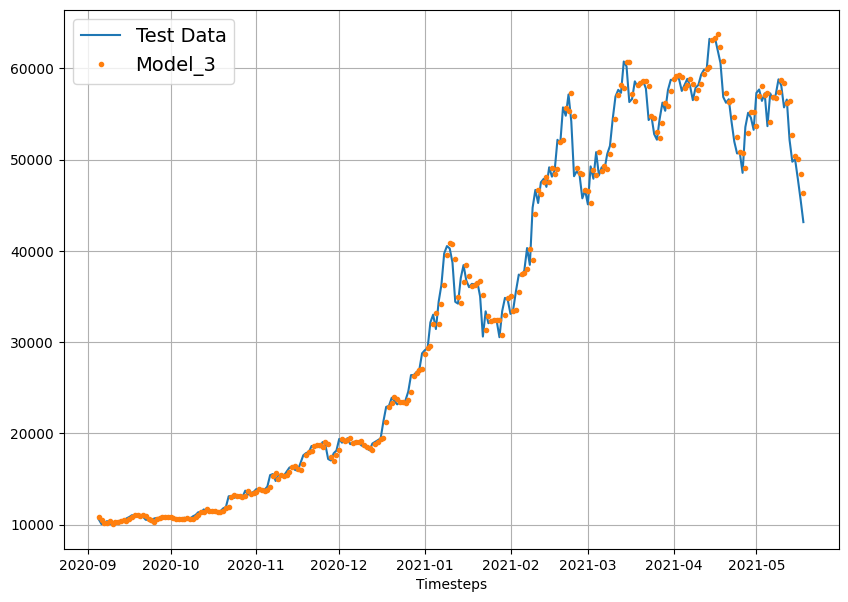

In [87]:
#Visualize the predictions
offset=300
plt.figure(figsize=(10,7))
plot_train_test_time_series(timesteps=X_test[-len(test_windows_4):], values=test_labels_4[:,0], format="-", start=offset, label="Test Data")
plot_train_test_time_series(timesteps=X_test[-len(test_windows_4):], values=model_4_preds, start=offset, label="Model_3")

In [88]:
#Get results
model_4_results = evaluate_time_series(tf.squeeze(test_labels_4), model_4_preds)
model_4_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=564.2481>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1157382.2>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=1075.817>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.5249004>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=0.9912276>}

In [89]:
model_1_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=565.20917>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1158454.5>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=1076.3153>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.5277812>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=0.992916>}

###Build Model 5

In [90]:
#Create the model using functional API
tf.random.set_seed(42)
inputs = layers.Input(shape=(WINDOW_SIZE_4))
expand_dim_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# lstm_layer = layers.LSTM(units=128, return_sequences=True, activation="relu")(expand_dim_layer)
lstm_layer_2 = layers.LSTM(units=128, activation="relu")(expand_dim_layer)
# dense = layers.Dense(32, activation="relu")(lstm_layer_2)
outputs = layers.Dense(HORIZON_4)(lstm_layer_2)
model_5 = tf.keras.Model(inputs,outputs, name="model_5")

#Compile the model
model_5.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae", "mse"]
)

#Fit the model
history_5 = model_5.fit(train_windows_4,
                        train_labels_4,
                        epochs=100,
                        validation_data=(train_windows_4, train_labels_4),
                        verbose=1,
                        batch_size=128,
                        callbacks=[create_model_checkpoint_callback(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 5s 118ms/step - loss: 2222.2485 - mae: 2222.2485 - mse: 12462209.0000 - val_loss: 1094.8712 - val_mae: 1094.8712 - val_mse: 3067098.7500
Epoch 2/100
18/18 [==============================] - 2s 90ms/step - loss: 441.2183 - mae: 441.2183 - mse: 738786.6250 - val_loss: 344.4965 - val_mae: 344.4965 - val_mse: 440031.5312
Epoch 3/100
18/18 [==============================] - 2s 109ms/step - loss: 238.2411 - mae: 238.2411 - mse: 240592.1094 - val_loss: 212.3627 - val_mae: 212.3627 - val_mse: 210623.5781
Epoch 4/100
18/18 [==============================] - 1s 84ms/step - loss: 192.8504 - mae: 192.8504 - mse: 191335.5625 - val_loss: 187.1703 - val_mae: 187.1703 - val_mse: 185446.0938
Epoch 5/100
18/18 [==============================] - 1s 86ms/step - loss: 188.8661 - mae: 188.8661 - mse: 189121.9844 - val_loss: 185.6970 - val_mae: 185.6970 - val_mse: 183432.0000
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 186.0481

In [91]:
#Evaluate the model
model_5.evaluate(test_windows_4, test_labels_4)

18/18 [==============================] - 0s 3ms/step - loss: 591.6158 - mae: 591.6158 - mse: 1263248.6250


[591.6158447265625, 591.6158447265625, 1263248.625]

In [92]:
#Load best saved model and evaluate it
model_5=tf.keras.models.load_model("model_experiments/model_5")
model_5.evaluate(test_windows_4, test_labels_4)

18/18 [==============================] - 0s 3ms/step - loss: 590.9116 - mae: 590.9116 - mse: 1251883.8750


[590.91162109375, 590.91162109375, 1251883.875]

In [93]:
#Make predictions
model_5_preds = make_preds(model_5, test_windows_4)
model_5_preds[:5]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8946.643, 8811.543, 8954.458, 8815.908, 8752.531], dtype=float32)>

In [94]:
#Get results
model_5_results = evaluate_time_series(tf.squeeze(test_labels_4), model_5_preds)
model_5_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=590.9116>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1251883.9>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=1118.8761>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.6618838>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=1.038068>}

##Build Mutivariate Time Series Dataset

**Read:** https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [95]:
#Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 #Jan 3, 2009 - this block reward isn't in our dataset (our data starts from Oct 2013)
block_reward_2 = 25 #Nov 8, 2012
block_reward_3 = 12.5 #July 9, 2016
block_reward_4 = 6.25 #May 18, 2020

#Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [96]:
#Add block reward values to dataframe
block_reward_2_days = (block_reward_3_datetime - btc_price_df.index[0]).days
block_reward_3_days = (block_reward_4_datetime - btc_price_df.index[0]).days
block_reward_2_days,block_reward_3_days

(1012, 2421)

In [97]:
#Add a column to dataframe
btc_price_df_block = btc_price_df.copy()
btc_price_df_block["block_reward"]=None
#Add block reward values as a feature to our dataframe
btc_price_df_block.iloc[:block_reward_2_days,-1] = block_reward_2
btc_price_df_block.iloc[block_reward_2_days:block_reward_3_days,-1] = block_reward_3
btc_price_df_block.iloc[block_reward_3_days:,-1] = block_reward_4

In [98]:
btc_price_df_block.tail()

Price block_reward
Date                                 
2021-05-14  49764.132082         6.25
2021-05-15  50032.693137         6.25
2021-05-16  47885.625255         6.25
2021-05-17  45604.615754         6.25
2021-05-18  43144.471291         6.25

<Axes: xlabel='Date'>

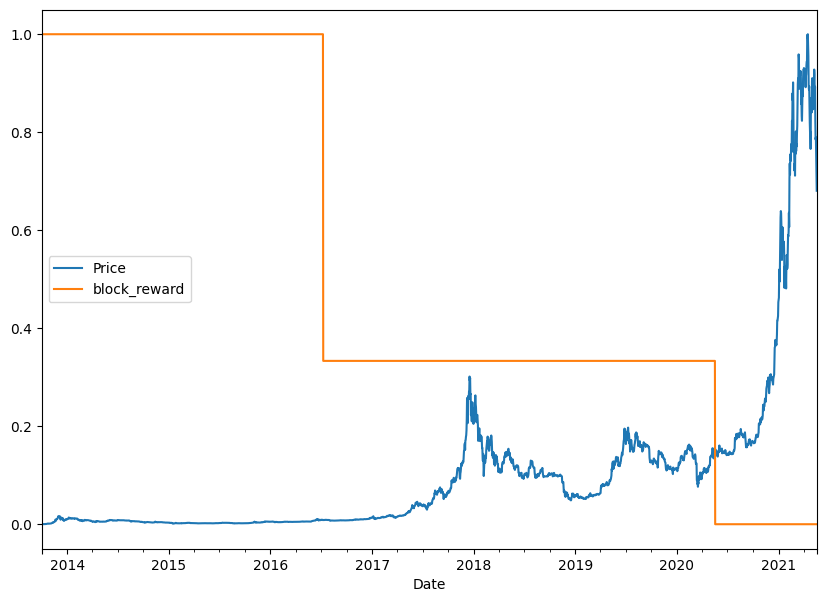

In [99]:
#Plot the block reward vs btc price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(btc_price_df_block[["Price","block_reward"]]),
                                     columns=btc_price_df_block.columns,
                                     index=btc_price_df_block.index)
scaled_price_block_df.plot(figsize=(10,7))

In [100]:
#Prepare windowed dataset using pandas shift method

#Set up hyperparameters
HORIZON_6=1
WINDOW_SIZE_6=7
#Copy dataframe
btc_prices_windowed = btc_price_df_block.copy()
#Add windowed columns
for i in range(WINDOW_SIZE_6):
  btc_prices_windowed[f"Price+{i+1}"] = btc_prices_windowed["Price"].shift(periods=i+1)
btc_prices_windowed.head(10)

Price block_reward    Price+1    Price+2    Price+3  \
Date                                                                  
2013-10-01  123.65499           25        NaN        NaN        NaN   
2013-10-02  125.45500           25  123.65499        NaN        NaN   
2013-10-03  108.58483           25  125.45500  123.65499        NaN   
2013-10-04  118.67466           25  108.58483  125.45500  123.65499   
2013-10-05  121.33866           25  118.67466  108.58483  125.45500   
2013-10-06  120.65533           25  121.33866  118.67466  108.58483   
2013-10-07  121.79500           25  120.65533  121.33866  118.67466   
2013-10-08  123.03300           25  121.79500  120.65533  121.33866   
2013-10-09  124.04900           25  123.03300  121.79500  120.65533   
2013-10-10  125.96116           25  124.04900  123.03300  121.79500   

              Price+4    Price+5    Price+6    Price+7  
Date                                                    
2013-10-01        NaN        NaN        NaN        NaN  
2013-10-02        NaN        NaN        NaN        NaN  
2013-10-03        NaN        NaN        NaN        NaN  
2013-10-04        NaN        NaN        NaN        NaN  
2013-10-05  123.65499        NaN        NaN        NaN  
2013-10-06  125.45500  123.65499        NaN        NaN  
2013-10-07  108.58483  125.45500  123.65499        NaN  
2013-10-08  118.67466  108.58483  125.45500  123.65499  
2013-10-09  121.33866  118.67466  108.58483  125.45500  
2013-10-10  120.65533  121.33866  118.67466  108.58483

In [101]:
#Slplit dataframe into features and labels
X = btc_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = btc_prices_windowed.dropna()["Price"].astype(np.float32)

In [102]:
#Make train and test sets using indexing
split_size=int(len(X)*0.8)
X_train, y_train  = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

###Build Model 6

In [103]:
from tensorflow.keras import layers
tf.random.set_seed(42)

#Create the model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_6")

#Compile the model
model_6.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae", "mse"]
)

#Fit the model
history_6 = model_6.fit(x=X_train,
                        y=y_train,
                        epochs=100,
                        validation_data=(X_test, y_test),
                        verbose=1,
                        callbacks=[create_model_checkpoint_callback(model_name=model_6.name)])

Epoch 1/100
70/70 [==============================] - 2s 15ms/step - loss: 514.8141 - mae: 514.8141 - mse: 1775680.8750 - val_loss: 1001.6466 - val_mae: 1001.6466 - val_mse: 3077577.2500
Epoch 2/100
70/70 [==============================] - 1s 9ms/step - loss: 172.2871 - mae: 172.2871 - mse: 151330.3281 - val_loss: 881.2207 - val_mae: 881.2207 - val_mse: 2554102.7500
Epoch 3/100
70/70 [==============================] - 1s 12ms/step - loss: 159.6539 - mae: 159.6539 - mse: 138545.4531 - val_loss: 819.2781 - val_mae: 819.2781 - val_mse: 2187209.0000
Epoch 4/100
70/70 [==============================] - 1s 11ms/step - loss: 151.7654 - mae: 151.7654 - mse: 121736.1875 - val_loss: 783.1689 - val_mae: 783.1689 - val_mse: 2054199.0000
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 146.1867 - mae: 146.1867 - mse: 113655.7031 - val_loss: 810.3221 - val_mae: 810.3221 - val_mse: 1950078.3750
Epoch 6/100
70/70 [==============================] - 1s 15ms/step - loss: 136.4202 -

In [104]:
#Eva;uate the model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 670.7950 - mae: 670.7950 - mse: 1383682.0000


[670.7949829101562, 670.7949829101562, 1383682.0]

In [105]:
model_6=tf.keras.models.load_model("/content/model_experiments/model_6")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 564.0178 - mae: 564.0178 - mse: 1152119.7500


[564.017822265625, 564.017822265625, 1152119.75]

In [106]:
#Make predictions
model_6_preds = make_preds(model_6, X_test)
model_6_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8840.873, 8758.002, 9027.692, 8768.034, 8718.489], dtype=float32)>

In [107]:
y_test.shape, model_6_preds.shape

((556,), TensorShape([556]))

In [108]:
model_6_results = evaluate_time_series(y_test, model_6_preds)
model_6_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=564.0178>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1152119.8>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=1073.3684>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.5208268>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=0.9908231>}

In [109]:
model_1_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=565.20917>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1158454.5>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=1076.3153>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.5277812>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=0.992916>}

In [110]:
model_4_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=564.2481>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1157382.2>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=1075.817>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.5249004>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=0.9912276>}

In [111]:
naive_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=567.9802>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1147547.0>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=1071.2362>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.516525>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=0.99957>}

###Build Model 7 - NBeats

We are going to replicate the N-Beats Neural basis expansion analysis for interpretable time series forecasting paper from the link below.

**Read:** https://arxiv.org/abs/1905.10437

####Building and testing the N-Beats block layer

The NBeats block layer doesn't exist in Tensorflow, we are going to create it using subclassing.

**Read:** https://www.tensorflow.org/guide/keras/making_new_layers_and_models_via_subclassing#:~:text=Making%20new%20layers%20and%20models%20via%20subclassing%201,composable%20...%206%20The%20add_loss%20%28%29%20method%20

In [112]:
#Create custom layer - NBeatsBlock layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): #the **kwargs argument takes care of all arguments for the parent class (input_shape, trainable etc.)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    #Block contains stack of 4 fully connected (Dense) layers each with Relu activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    #Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x=inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    #Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

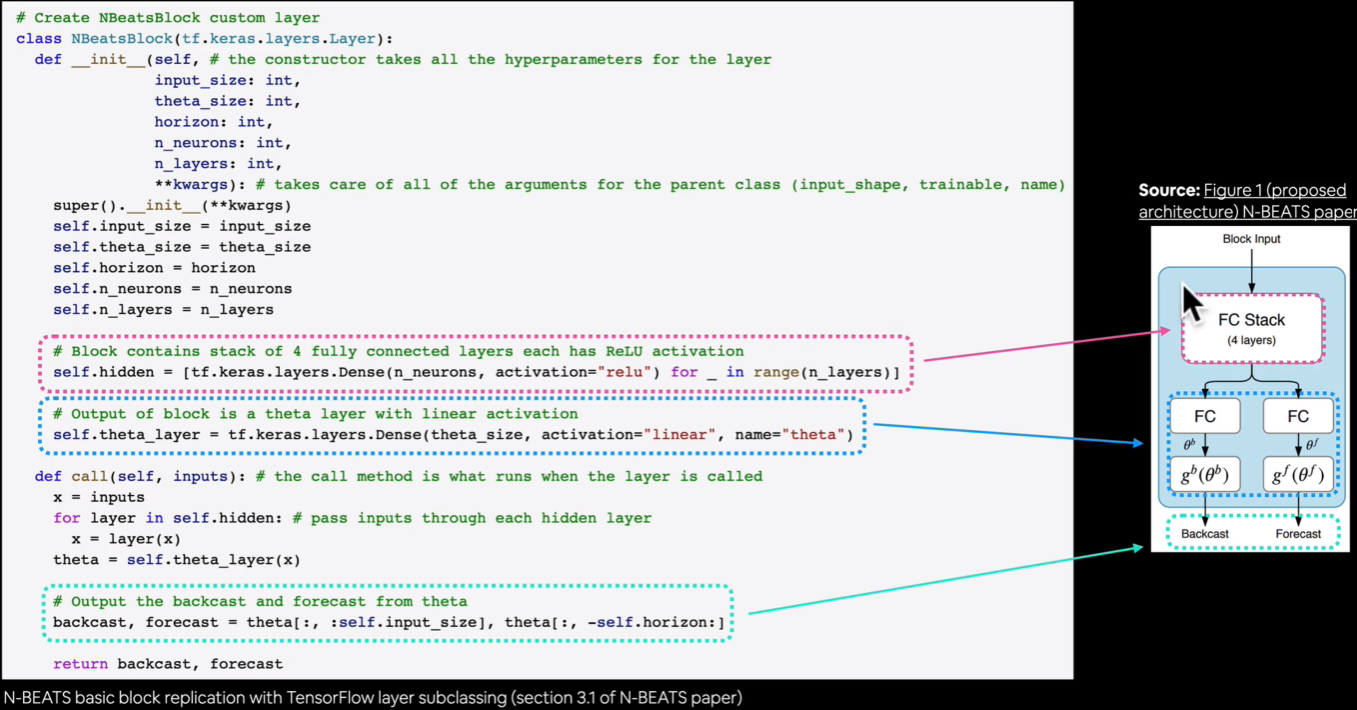

In [113]:
#Let's try NBeats layer on dummy inputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE_6,
                                       theta_size=WINDOW_SIZE_6+HORIZON_6,
                                       horizon=HORIZON_6,
                                       n_neurons=128,
                                       n_layers=4)

In [114]:
#Create dummy inputs
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE_6)+1, axis=0) #input shape to the model has to reflect dense layer input
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [115]:
#Pass dummy inputs to NBeatsBlock layer
backcast,forecast = dummy_nbeats_block_layer(dummy_inputs)
#These are the activation outputs of the theta layer (they will be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.07689629 -0.1031456   0.19370022 -0.2070265   0.77189267 -0.49547207
 -0.98775065]
Forecast: -0.0980343371629715


####Building and preparing dataset for NBeats model using tf.data

To make our data load as fast as possible we will be adhering to the performant data pipeline steps in the tf.data guide. Model 7 will be using univariate input data.

In [116]:
#Set up hyperparameters
HORIZON_7=1
WINDOW_SIZE_7=7

In [117]:
#NBeats works with univariate input series
btc_price_df_nbeats = btc_price_df.copy()
for i in range(WINDOW_SIZE_7):
  btc_price_df_nbeats[f"Price+{i+1}"] = btc_price_df_nbeats["Price"].shift(periods=i+1)
btc_price_df_nbeats.head()

Price    Price+1    Price+2    Price+3    Price+4  Price+5  \
Date                                                                         
2013-10-01  123.65499        NaN        NaN        NaN        NaN      NaN   
2013-10-02  125.45500  123.65499        NaN        NaN        NaN      NaN   
2013-10-03  108.58483  125.45500  123.65499        NaN        NaN      NaN   
2013-10-04  118.67466  108.58483  125.45500  123.65499        NaN      NaN   
2013-10-05  121.33866  118.67466  108.58483  125.45500  123.65499      NaN   

            Price+6  Price+7  
Date                          
2013-10-01      NaN      NaN  
2013-10-02      NaN      NaN  
2013-10-03      NaN      NaN  
2013-10-04      NaN      NaN  
2013-10-05      NaN      NaN

In [118]:
#Make features and labels
X = btc_price_df_nbeats.dropna().drop("Price", axis=1)
y = btc_price_df_nbeats.dropna()["Price"]

#Split train and test sets
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [119]:
X_train.shape

(2224, 7)

In [120]:
#Use tf.data API to make dataset
train_features_ds = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_ds = tf.data.Dataset.from_tensor_slices(y_train)
test_features_ds = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_ds = tf.data.Dataset.from_tensor_slices(y_test)

#Combine feature and labels by zipping together
train_dataset = tf.data.Dataset.zip(train_features_ds, train_labels_ds)
test_dataset = tf.data.Dataset.zip(test_features_ds, test_labels_ds)
train_dataset, test_dataset

(<_ZipDataset element_spec=(TensorSpec(shape=(7,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>,
 <_ZipDataset element_spec=(TensorSpec(shape=(7,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>)

In [121]:
#Batch and prefetch datasets
BATCH_SIZE=1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

In [122]:
#Set up hyperparameters for NBeats generic model for daily data
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30
INPUT_SIZE = WINDOW_SIZE_7
THETA_SIZE = INPUT_SIZE+HORIZON_7
INPUT_SIZE, THETA_SIZE

(7, 8)

####Get ready for residual connections

We need two layers for residual connections - add and subtract.


In [123]:
#Make tensors
tensor_1 = tf.range(10)+10
tensor_2 = tf.range(10)

#Subtract
subtracted = layers.subtract([tensor_1,tensor_2])

#Add
added = layers.add([tensor_1,tensor_2])

#Print outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


Building the Model 7

1. Setup an instance of NBeats Block layer
2. Create an input layer for the NBeats stack using functional API
3. Make the initial backcast and forecast for the model with the first layer created
4. Use for loop to create stacks of block layers
5. Use `NBeatsBlock` class within the for loop to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss and Adam optimizer.
9. Fit the model for 5000 epochs with callbacks:
  * Early stopping
  * Reduce LR on Plateau

In [124]:
%%time
#Set random seed
tf.random.set_seed(42)
#1. Setup an instance of NBeatsBlock layer
nbeats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                 theta_size = THETA_SIZE,
                                 horizon = HORIZON,
                                 n_neurons = N_NEURONS,
                                 n_layers = N_LAYERS,
                                 name="InitialBlock")
#2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")
#3. Create initial backcast and forecast
residuals, forecast = nbeats_block_layer(stack_input)
#4. Use for loop to create stack of block layers (first stack already created in step 3)
for i, _ in enumerate(range(N_STACKS-1)):
  #5. Create NBeatsBlock to create blocks which return backcast and block-level forecast
  backcast, block_forecast = NBeatsBlock(
      input_size = INPUT_SIZE,
      theta_size = THETA_SIZE,
      horizon = HORIZON,
      n_neurons = N_NEURONS,
      n_layers = N_LAYERS,
      name = f"NBeatsBlock_{i}"
  )(residuals)
  #6. Create the double residual stacking
  residuals = layers.subtract([residuals,backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")
#7. Create the model
model_7 = tf.keras.Model(inputs = stack_input, outputs = forecast, name="model_7")
#8. Compile the model
model_7.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)
#9. Fit the model
history_7 = model_7.fit(train_dataset,
                        epochs=N_EPOCHS,
                        validation_data=test_dataset,
                        verbose=0,
                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                                    patience=200,
                                                                    restore_best_weights=True),
                                   tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                        patience=100,
                                                                        verbose=1)])


Epoch 805: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 905: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 3min 40s, sys: 5.84 s, total: 3min 46s
Wall time: 4min 25s


In [125]:
#Evaluate the model
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 19ms/step - loss: 577.5680


577.5679931640625

In [126]:
#Make predictions
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8909.587, 8805.395, 9038.071, 8820.195, 8742.198, 8768.256,
       8703.087, 8539.813, 8488.76 , 8537.814], dtype=float32)>

In [127]:
model_7_results = evaluate_time_series(y_test, model_7_preds)
model_7_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=577.568>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1203619.5>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=1097.096>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.6041503>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=1.014627>}

In [128]:
model_1_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=565.20917>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1158454.5>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=1076.3153>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.5277812>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=0.992916>}

In [129]:
model_4_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=564.2481>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1157382.2>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=1075.817>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.5249004>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=0.9912276>}

In [130]:
naive_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=567.9802>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1147547.0>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=1071.2362>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.516525>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=0.99957>}

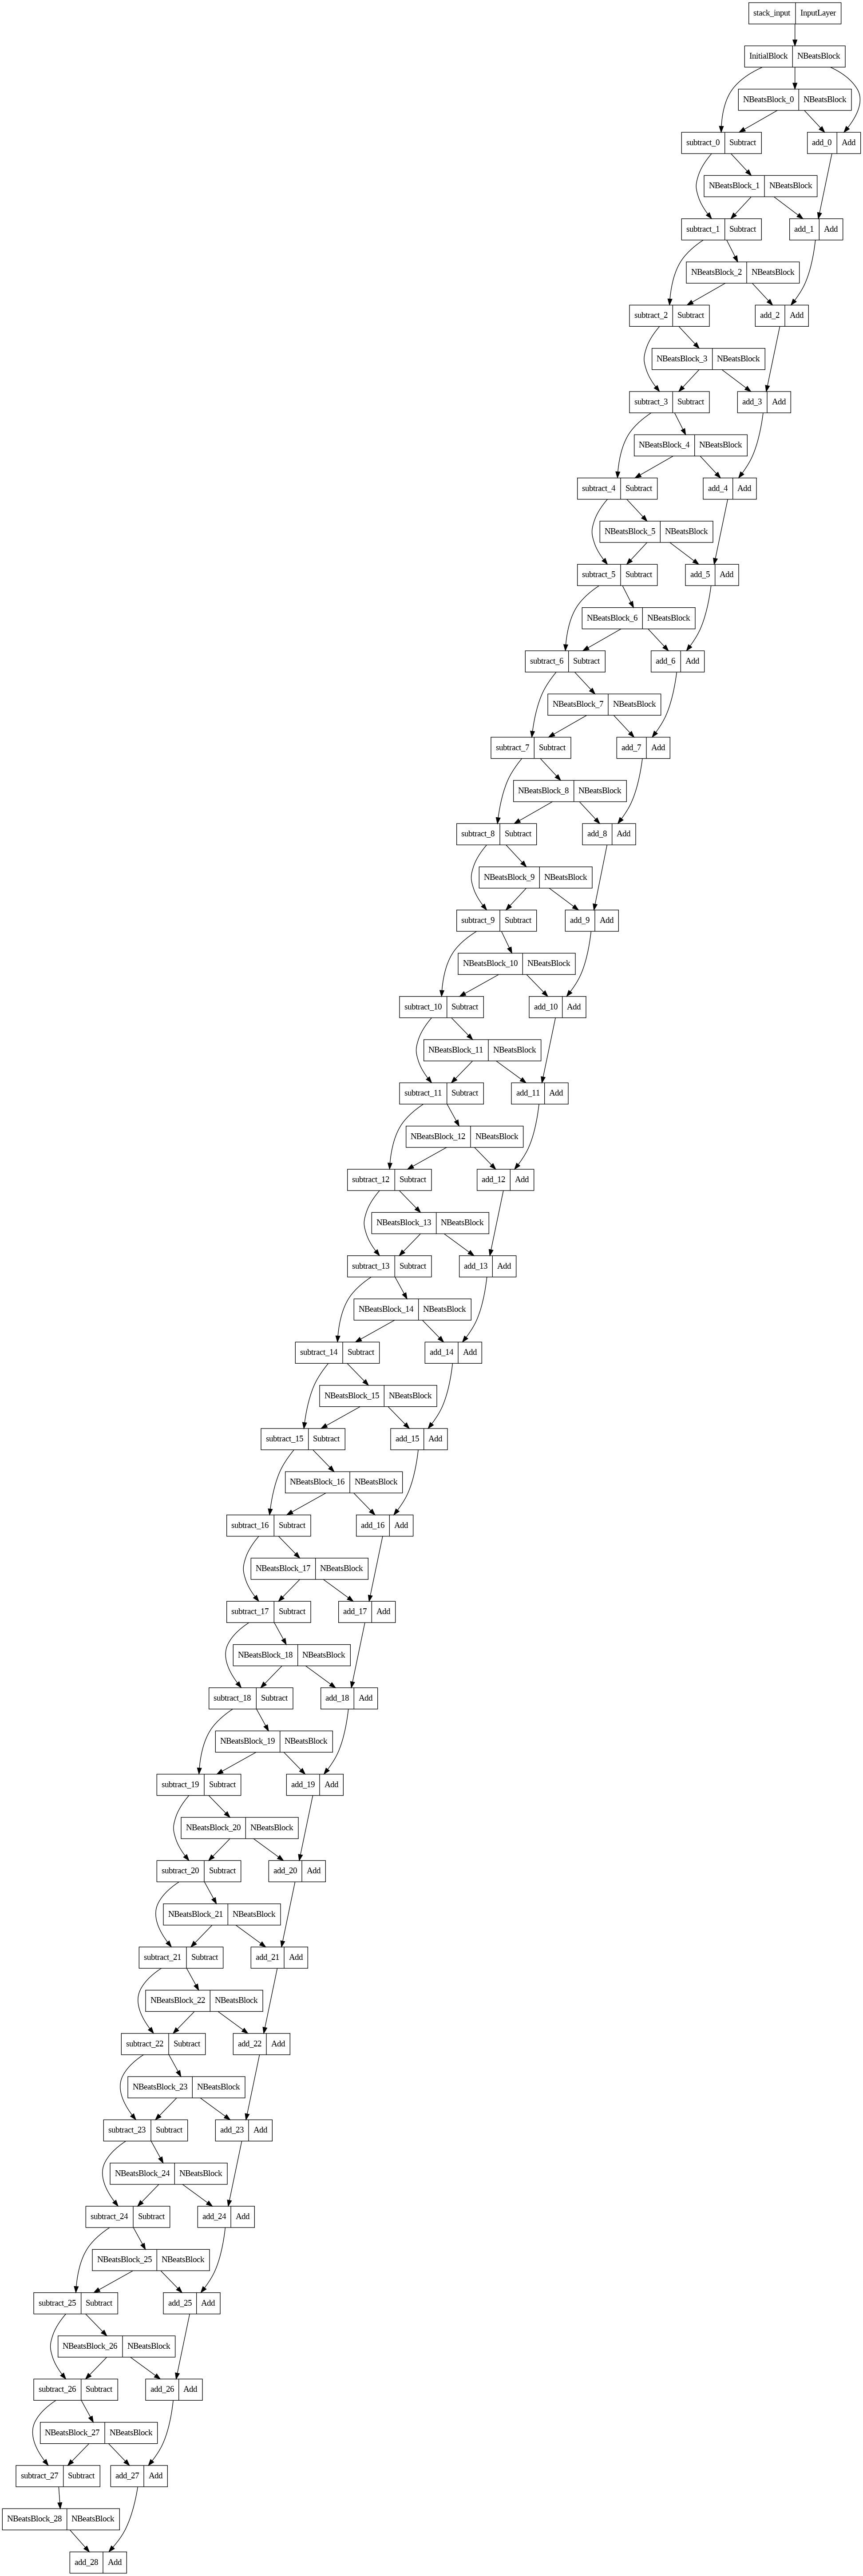

In [131]:
#Visualize the model
from tensorflow.keras.utils import plot_model
plot_model(model_7)

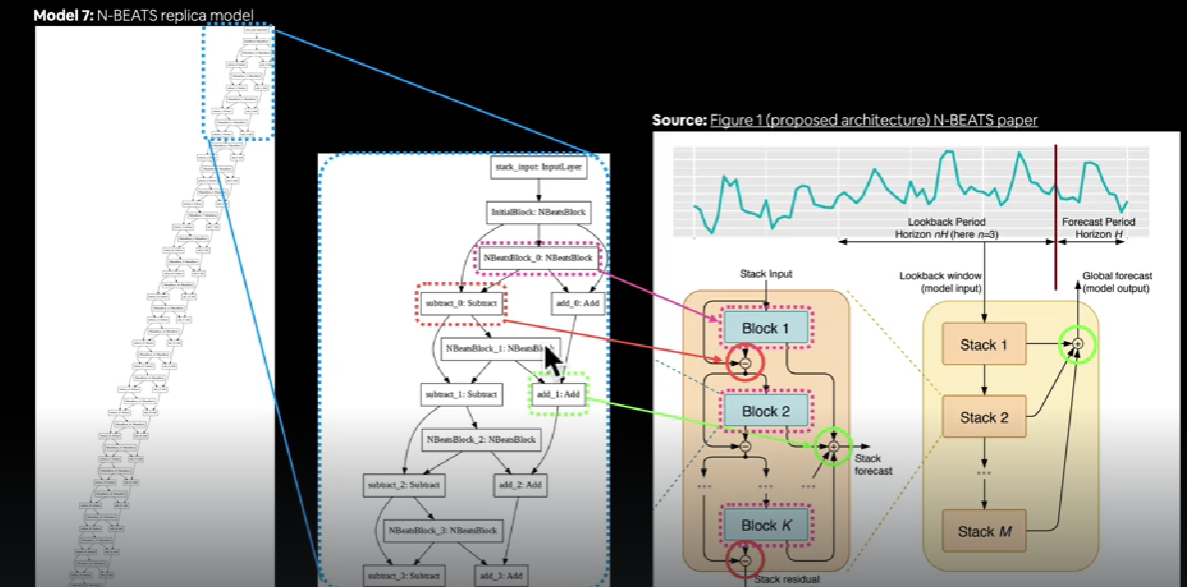

###Build Model 8 - Ensemble

An ensemble leverages the wisdom of the crowd effect. It combines models to predict a common goal.

In [132]:
#Constructing and fitting an ensemble of models
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fn=["mae","mse","mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.
  For example, if num_iter=10, a list of 30 trained models will be returned:
  10*len(["mae","mse","mape"])
  """
  #Make empty list for trained ensemble models
  ensemble_models=[]
  #Create num_iter number of models per loss function
  for i in range(num_iter):
    #Build and fit a new model with different loss function
    for loss_function in loss_fn:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")
      #Construct a simple model similar to model_1
      model=tf.keras.Sequential([
          #Initializing dense layer with normal distribution for estimating prediction
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(HORIZON)
      ])
      #Compile simple model with current loss function
      model.compile(
          loss=loss_function,
          optimizer=tf.keras.optimizers.Adam(),
          metrics=["mae","mse"]
      )
      #Fit the model
      model.fit(train_data,
                epochs=num_epochs,
                validation_data=test_data,
                verbose=0,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)]
               )
      ensemble_models.append(model)
  return ensemble_models


In [133]:
%%time
ensemble_models=get_ensemble_models(num_iter=5,
                                    num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 598: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 698: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 191: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 291: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 204: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 304: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 388: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 538: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 638: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing 

In [134]:
len(ensemble_models)

15

In [135]:
#Make predictions with ensemble model
#Create a function that uses a list of models and makes predictions
def make_ensemble_preds(ensemble_models,data):
  ensemble_preds=[]
  for model in ensemble_models:
    preds=model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [136]:
#Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)

1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 37ms/step
CPU times: user 660 ms, sys: 26.8 ms, total: 687 ms
Wall time: 865 ms


In [137]:
ensemble_preds.shape, model_1_preds.shape

(TensorShape([15, 556]), TensorShape([556]))

In [138]:
#Evaluate ensemble models (the function takes the mean of metrics values)
ensemble_results = evaluate_time_series(y_test, ensemble_preds)
ensemble_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=580.3955>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1181577.9>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=1086.9398>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.6327825>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=1.0195943>}

**Read:** https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/

In [139]:
#Take the mean of 15 model predictions
ensemble_preds_mean = tf.reduce_mean(ensemble_preds,axis=0)
ensemble_preds_mean.shape

TensorShape([556])

In [140]:
#Evaluate ensemble models
ensemble_results_2 = evaluate_time_series(y_test, ensemble_preds_mean)
ensemble_results_2

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=569.02026>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1151975.1>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=1073.301>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.568909>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=0.999611>}

In [141]:
#Take the median of 15 model predictions
ensemble_preds_median = np.median(ensemble_preds, axis=0)
ensemble_preds_median.shape

(556,)

In [142]:
#Evaluate ensemble models
ensemble_results_3 = evaluate_time_series(y_test, ensemble_preds_median)
ensemble_results_3

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=570.1724>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1155723.4>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=1075.0458>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.572664>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=1.0016351>}

In [143]:
model_1_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=565.20917>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1158454.5>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=1076.3153>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.5277812>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=0.992916>}

In [144]:
model_4_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=564.2481>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1157382.2>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=1075.817>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.5249004>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=0.9912276>}

##Plotting the prediction intervals (uncertainty estimates)

So far, we have been making point predictions wiht our models. It would have been helpful to know a range of where that prediction came from.

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:
1. Take the predictions from a number of randomly initialized models (ensemble model).
2. Measure the standard deviation of the predictions.
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal), 95% of observations fall withing the 1.96 standard deviations of the mean.
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in step 3 to the mean/median of the predictions made in step 1

In [145]:
model_4_preds.shape

TensorShape([556])

In [146]:
#Find the upper and lower bounds of ensemble predictions
#1.Take the predictions from a number of randomly initialized models
def get_upper_lower(preds):
  #2.Measure the standard deviation of predictions
  std=tf.math.reduce_std(preds,axis=0)
  #3.Multiply std by 1.96
  interval=1.96*std
  #4.Get the prediction upper and lower bounds
  preds_mean = tf.reduce_mean(preds,axis=0)
  lower,upper = preds_mean-interval, preds_mean+interval
  return lower, upper

In [147]:
lower, upper = get_upper_lower(ensemble_preds)

**Read:** https://machinelearningmastery.com/prediction-intervals-for-deep-learning-neural-networks/

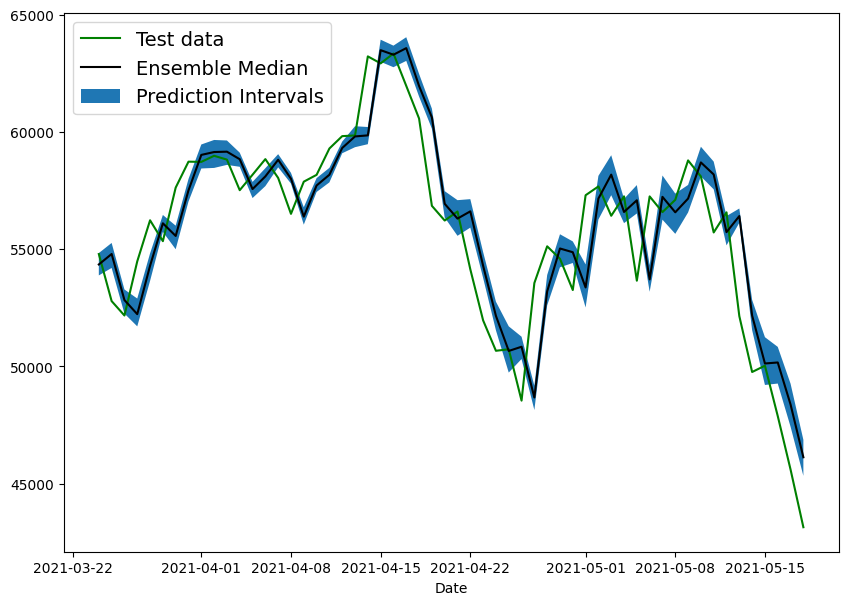

In [148]:
#Get the median/mean values of ensemble_preds
ensemble_median = np.median(ensemble_preds,axis=0)
#Plot the median of our ensemble preds along with intervals
offset=500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
#To plot the upper and lower bounds let's use fill_between method
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:],
                 label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14)

So far all of our model prediction were lagging behind the test data, as if replicatig the Naive model. These prediction intervals are estimates themselves and they have been created with an assumption that our model's data has a normal distribution.

##Two types of uncertainty (coconut and subway)

Uncertainty estimates in machine learning seek out to qualitatively and quantitatively answer the questions:
1. What can my model know? (with perfect data, what's possible for a model to learn?)
2. WHat doesn't my model know? (what can a model never predict?) Or would it be helpful if a model could tell you that when it's making prediction, it doesn't know if it's right or not?

There are two major types of uncertainty in machine learning:
* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced and is often referred as data uncertainty or "subway" uncertainty.
* **Epistemic uncertainty** - this type of uncertainty can be reduced and is also referred to as "model" or "coconut" uncertainty.

###Build Model 9 - Future Prediction Model

So far all of our models were predicted on test dataset. Now, we will be predicting into the future.

In [149]:
HORIZON_9=1
WINDOW_SIZE_9=7
btc_prices_windowed.head()

Price block_reward    Price+1    Price+2    Price+3  \
Date                                                                  
2013-10-01  123.65499           25        NaN        NaN        NaN   
2013-10-02  125.45500           25  123.65499        NaN        NaN   
2013-10-03  108.58483           25  125.45500  123.65499        NaN   
2013-10-04  118.67466           25  108.58483  125.45500  123.65499   
2013-10-05  121.33866           25  118.67466  108.58483  125.45500   

              Price+4  Price+5  Price+6  Price+7  
Date                                              
2013-10-01        NaN      NaN      NaN      NaN  
2013-10-02        NaN      NaN      NaN      NaN  
2013-10-03        NaN      NaN      NaN      NaN  
2013-10-04        NaN      NaN      NaN      NaN  
2013-10-05  123.65499      NaN      NaN      NaN

In [150]:
#Train model on the entire dataset
X_all = btc_prices_windowed.dropna().drop(["Price","block_reward"], axis=1).to_numpy()
#Get labels
y_all = btc_prices_windowed.dropna()["Price"].to_numpy()
len(X_all), len(y_all)

(2780, 2780)

In [151]:
X_all[:5], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [152]:
X_all.shape, y_all.shape

((2780, 7), (2780,))

In [153]:
#Let's turn data into efficient tensors
features_ds_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_ds_all = tf.data.Dataset.from_tensor_slices(y_all)
#Combine feature and label datasets
dataset_all = tf.data.Dataset.zip((features_ds_all, labels_ds_all))
#Batch and prefetch for optimal performance
BATCH_SIZE=1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [154]:
#Create the model
tf.random.set_seed(42)
model_9 = tf.keras.Sequential([
    layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
    layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
    layers.Dense(HORIZON_9)
], name="model_9")
#Compile the model
model_9.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae","mse"]
)
#Fit the model
history_9 = model_9.fit(dataset_all,
                        epochs=100,
                        verbose=0)

To make prediction into the future we want a function that:
1.Takes as input:
  * alist of values `X_all`
  * a trained model `model_9`
  * a window into the future to predict `future_timesteps`
  * the window size a model was trained `window_size`\
2.Creates an empty list for future forecasts and extracts the last `window_size` value from the input values.
3.Loops `future_timsteps` times making a prediction on `window_size` sequences which update to remove the first value and append the latest prediction.

In [155]:
one_trial = tf.expand_dims(y_all[-WINDOW_SIZE_9:],axis=0).numpy()
one_trial, one_trial.shape

(array([[56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
         47885.62525472, 45604.61575361, 43144.47129086]]),
 (1, 7))

In [156]:
#Make predictions into the future
FUTURE_TIMESTEPS=14
#Create the function
def make_future_forecasts(values, model, future_timesteps, window_size) -> list:
  """
  Make future forecasts future_timesteps afer values end.
  """
  #Create an empty list for future forecasts
  future_forecasts=[]
  last_window = values[-window_size:]
  #Make future_timesteps number of predictions
  for _ in range(future_timesteps):
    #Predict on the last window then append it to the values
    future_pred = model.predict(tf.expand_dims(last_window, axis=0).numpy())
    print(f"Predicting on:\ {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}")
    #Append prediction to future_forecast list
    future_forecasts.append(tf.squeeze(future_pred).numpy())
    #Update last window with new pred and get window_size most recent preds
    last_window= np.append(last_window,future_pred)[-window_size:]
  return future_forecasts

In [157]:
future_prediction = make_future_forecasts(y_all, model_9, FUTURE_TIMESTEPS, WINDOW_SIZE_9)

1/1 [==============================] - 0s 51ms/step
Predicting on:\ [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 57305.91015625
1/1 [==============================] - 0s 19ms/step
Predicting on:\ [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 57305.91015625] -> Prediction: 50900.39453125
1/1 [==============================] - 0s 17ms/step
Predicting on:\ [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 57305.91015625 50900.39453125] -> Prediction: 49798.48828125
1/1 [==============================] - 0s 16ms/step
Predicting on:\ [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 57305.91015625 50900.39453125 49798.48828125] -> Prediction: 50096.0546875
1/1 [==============================] - 0s 17ms/step
Predicting on:\ [47885.62525472 45604.61575361 43144.47129086 57305.91015625
 50900.39453125 49798.48828125 50096.0546875 ] -

In [158]:
future_prediction

[57305.91,
 50900.395,
 49798.49,
 50096.055,
 48012.6,
 45412.793,
 47137.254,
 56696.164,
 49284.434,
 49860.402,
 51551.37,
 47158.574,
 46975.574,
 50153.457]

In [159]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array fo datetime values ranging from start_date to start_date+into_future.
  """
  start_date = start_date + np.timedelta64(offset,"D")
  end_date = start_date + np.timedelta64(into_future, "D")
  return np.arange(start_date, end_date, dtype="datetime64[D]")


In [160]:
#Last timestep of training dataset
last_timestep = btc_price_df.index[-1]
last_timestep, type(last_timestep)

(Timestamp('2021-05-18 00:00:00'), pandas._libs.tslibs.timestamps.Timestamp)

In [161]:
#Get next two weeks timesteps
next_timesteps = get_future_dates(start_date=last_timestep,
                                  into_future = FUTURE_TIMESTEPS)
next_timesteps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [162]:
#Insert last timestep/final price into next_timesteps and future_prediction
next_timesteps = np.insert(next_timesteps, 0, last_timestep)
future_prediction = np.insert(future_prediction, 0, btc_price[-1])
next_timesteps, future_prediction

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 57305.91 , 50900.395, 49798.49 , 50096.055, 48012.6  ,
        45412.793, 47137.254, 56696.164, 49284.434, 49860.402, 51551.37 ,
        47158.574, 46975.574, 50153.457], dtype=float32))

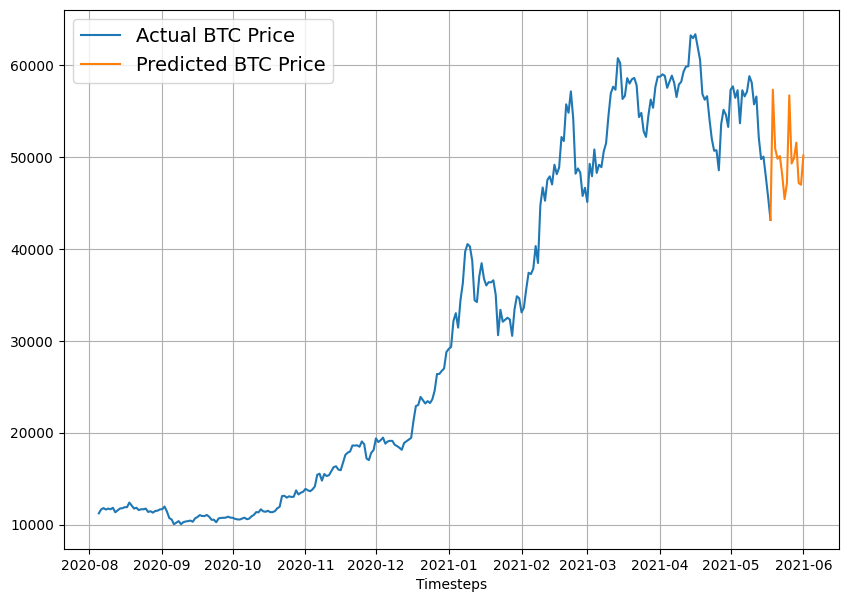

In [163]:
#Visualize future forecasts
plt.figure(figsize=(10,7))
plot_train_test_time_series(btc_price_df.index,btc_price, start=2500, format="-", label="Actual BTC Price")
plot_train_test_time_series(next_timesteps, future_prediction, format="-", label="Predicted BTC Price")

###Build Model 10 - The Turkey Problem

In [164]:
#Let's introduce a turkey problem where BTC price falls 100x one day
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100

In [165]:
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [166]:
timesteps_turkey = np.array(btc_price_df.index)
timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

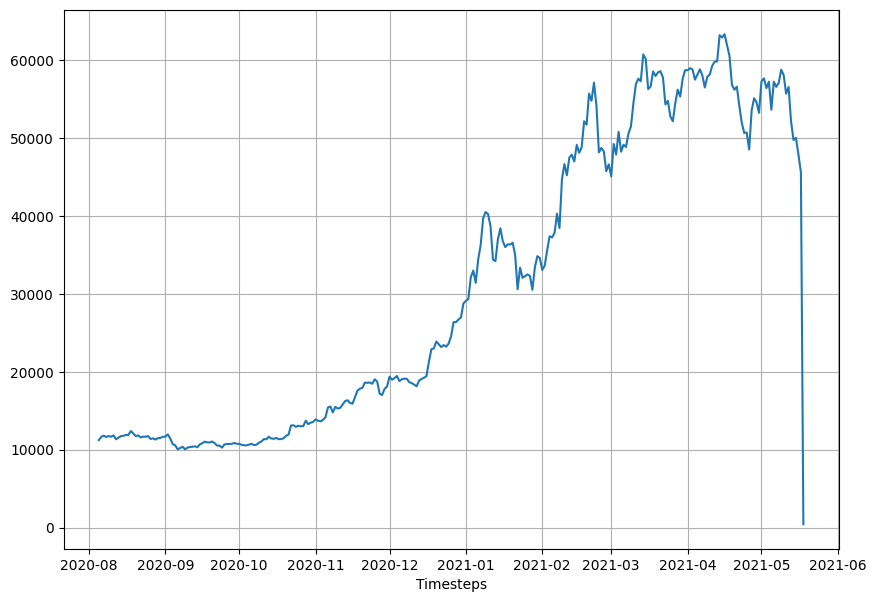

In [167]:
plt.figure(figsize=(10,7))
plot_train_test_time_series(timesteps_turkey,btc_price_turkey, start=2500, format="-")

In [168]:
#Create train and test sets for turkey problem data
WINDOW_SIZE_10=7
HORIZON_10=1

In [169]:
train_windows_10, train_labels_10 = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE_10, horizon=HORIZON_10)
X_train, X_test, y_train, y_test =  make_train_test_splits(train_windows_10, train_labels_10)

Window step: [[0 1 2 3 4 5 6 7]]
Window indexes: (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))
Window array: [[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361   431.44471291]]


In [170]:
tf.random.set_seed(42)
from tensorflow.keras import layers
#Create the model
model_10 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_10")

#Compile the model
model_10.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae", "mse"]
)

#Fit the model
history_10 = model_10.fit(x=X_train,
                        y=y_train,
                        epochs=100,
                        validation_data=(X_test, y_test),
                        verbose=0,
                        batch_size=1024,
                        callbacks=[create_model_checkpoint_callback(model_name=model_10.name)])

In [171]:
model_10.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 852.4822 - mae: 852.4822 - mse: 5862993.5000


[852.482177734375, 852.482177734375, 5862993.5]

In [172]:
loaded_model_10 = tf.keras.models.load_model("model_experiments/model_10")

In [173]:
loaded_model_10.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 822.4151 - mae: 822.4151 - mse: 5909957.0000


[822.4151000976562, 822.4151000976562, 5909957.0]

In [174]:
model_10_preds = make_preds(loaded_model_10, X_test)

18/18 [==============================] - 0s 1ms/step


In [175]:
model_10_preds[-10:]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([56546.188, 57783.91 , 58066.805, 57071.816, 57307.363, 55545.215,
       52919.555, 52372.305, 50536.25 , 47914.035], dtype=float32)>

In [176]:
model_10_results = evaluate_time_series(y_test,
                                        model_10_preds)
model_10_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=17118.79>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=614998340.0>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=23728.537>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=121.25073>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=26.49138>}

In [177]:
model_1_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=565.20917>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1158454.5>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=1076.3153>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.5277812>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=0.992916>}

In [178]:
model_4_results

{'mae': <tf.Tensor: shape=(), dtype=float32, numpy=564.2481>,
 'mse': <tf.Tensor: shape=(), dtype=float32, numpy=1157382.2>,
 'rmse': <tf.Tensor: shape=(), dtype=float32, numpy=1075.817>,
 'mape': <tf.Tensor: shape=(), dtype=float32, numpy=2.5249004>,
 'mase': <tf.Tensor: shape=(), dtype=float32, numpy=0.9912276>}

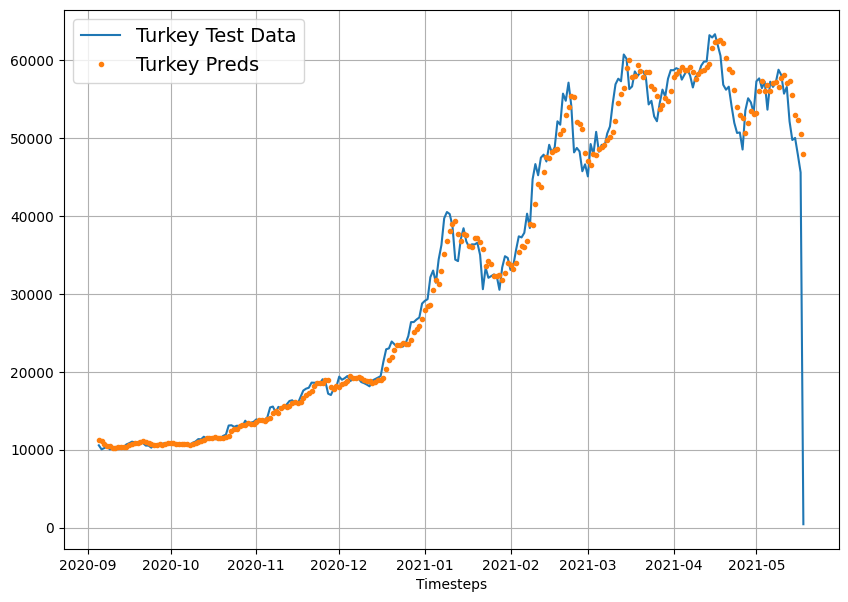

In [179]:
plt.figure(figsize=(10,7))
offset=300
plot_train_test_time_series(timesteps=timesteps_turkey[-len(X_test):],
                            values=btc_price_turkey[-len(X_test):],
                            format="-",
                            label="Turkey Test Data", start=offset)
plot_train_test_time_series(timesteps=timesteps_turkey[-len(X_test):],
                            values=model_10_preds,
                            label="Turkey Preds",
                            start=offset)

In [180]:
model_10_results.values()

dict_values([<tf.Tensor: shape=(), dtype=float32, numpy=17118.79>, <tf.Tensor: shape=(), dtype=float32, numpy=614998340.0>, <tf.Tensor: shape=(), dtype=float32, numpy=23728.537>, <tf.Tensor: shape=(), dtype=float32, numpy=121.25073>, <tf.Tensor: shape=(), dtype=float32, numpy=26.49138>])

In [181]:
models_results = pd.DataFrame({"model_0": [naive_results["mae"].numpy(),naive_results["mse"].numpy(), naive_results["rmse"].numpy(), naive_results["mape"].numpy(), naive_results["mase"].numpy()]}).T
models_results

0          1            2         3        4
model_0  567.980225  1147547.0  1071.236206  2.516525  0.99957

In [182]:
models_results = pd.DataFrame({"model_0": [naive_results["mae"].numpy(),naive_results["mse"].numpy(), naive_results["rmse"].numpy(), naive_results["mape"].numpy(), naive_results["mase"].numpy()],
                               "model_1": [model_1_results["mae"].numpy(),model_1_results["mse"].numpy(), model_1_results["rmse"].numpy(), model_1_results["mape"].numpy(), model_1_results["mase"].numpy()],
                               "model_2": [model_2_results["mae"].numpy(),model_2_results["mse"].numpy(), model_2_results["rmse"].numpy(), model_2_results["mape"].numpy(), model_2_results["mase"].numpy()],
                               "model_3": [model_3_results["mae"].numpy(),model_3_results["mse"].numpy(), model_3_results["rmse"].numpy(), model_3_results["mape"].numpy(), model_3_results["mase"].numpy()],
                               "model_4": [model_4_results["mae"].numpy(),model_4_results["mse"].numpy(), model_4_results["rmse"].numpy(), model_4_results["mape"].numpy(), model_4_results["mase"].numpy()],
                               "model_5": [model_5_results["mae"].numpy(),model_5_results["mse"].numpy(), model_5_results["rmse"].numpy(), model_5_results["mape"].numpy(), model_5_results["mase"].numpy()],
                               "model_6": [model_6_results["mae"].numpy(),model_6_results["mse"].numpy(), model_6_results["rmse"].numpy(), model_6_results["mape"].numpy(), model_6_results["mase"].numpy()],
                               "model_7": [model_7_results["mae"].numpy(),model_7_results["mse"].numpy(), model_7_results["rmse"].numpy(), model_7_results["mape"].numpy(), model_7_results["mase"].numpy()],
                               "model_8": [ensemble_results["mae"].numpy(),ensemble_results["mse"].numpy(), ensemble_results["rmse"].numpy(), ensemble_results["mape"].numpy(), ensemble_results["mase"].numpy()],
                               "model_10": [model_10_results["mae"].numpy(),model_10_results["mse"].numpy(), model_10_results["rmse"].numpy(), model_10_results["mape"].numpy(), model_10_results["mase"].numpy()]}).T
models_results

0             1             2           3          4
model_0     567.980225  1.147547e+06   1071.236206    2.516525   0.999570
model_1     565.209167  1.158454e+06   1076.315308    2.527781   0.992916
model_2     583.157471  1.185926e+06   1089.002319    2.649935   1.019365
model_3    1202.496338  5.181808e+06   1385.512451    5.453895   2.139775
model_4     564.248108  1.157382e+06   1075.817017    2.524900   0.991228
model_5     590.911621  1.251884e+06   1118.876099    2.661884   1.038068
model_6     564.017822  1.152120e+06   1073.368408    2.520827   0.990823
model_7     577.567993  1.203620e+06   1097.095947    2.604150   1.014627
model_8     580.395508  1.181578e+06   1086.939819    2.632782   1.019594
model_10  17118.789062  6.149983e+08  23728.537109  121.250732  26.491381

In [183]:
models_results = models_results.rename({0:'mae', 1:'mse', 2:'rmse', 3:'mape', 4:'mase'},axis='columns')
models_results

mae           mse          rmse        mape       mase
model_0     567.980225  1.147547e+06   1071.236206    2.516525   0.999570
model_1     565.209167  1.158454e+06   1076.315308    2.527781   0.992916
model_2     583.157471  1.185926e+06   1089.002319    2.649935   1.019365
model_3    1202.496338  5.181808e+06   1385.512451    5.453895   2.139775
model_4     564.248108  1.157382e+06   1075.817017    2.524900   0.991228
model_5     590.911621  1.251884e+06   1118.876099    2.661884   1.038068
model_6     564.017822  1.152120e+06   1073.368408    2.520827   0.990823
model_7     577.567993  1.203620e+06   1097.095947    2.604150   1.014627
model_8     580.395508  1.181578e+06   1086.939819    2.632782   1.019594
model_10  17118.789062  6.149983e+08  23728.537109  121.250732  26.491381

<Axes: >

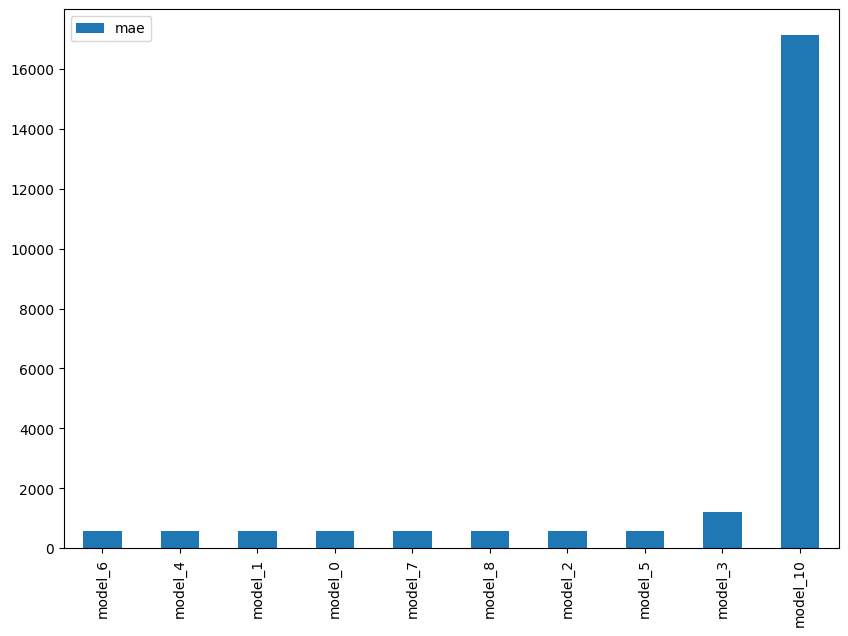

In [184]:
models_results[["mae"]].sort_values(by="mae").plot(figsize=(10,7), kind='bar')